# 0- `Step 0: Config` 

In [1]:
%run s0_config.ipynb

# Reach adata paths by accessing the Process 0's config 
process_0_s0_config = access_data_path("process_0", "s0_config.ipynb") 
%run $process_0_s0_config 

/opt/miniconda3/envs/bilimnn_sc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.1 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 pynndescent==0.5.12


In [2]:
import openai 
from openai.embeddings_utils import get_embeddings  
openai.api_key = OPENAI_API_KEY 

# 1- `Step 1: Load` 

#### 1- `Data` 

In [3]:
processed_adata_path = access_data_path("process_0", f"{check_point_s6}")  

adata = sc.read(processed_adata_path)    

#### 2- `Helpers` 

In [4]:
true_label_Total_DF_path = access_data_path(f"process_0/data/{folder_s9_extract}", f"true_label_Total_DF.pkl")  
with open(true_label_Total_DF_path , 'rb') as file:
    true_label_Total_DF = pickle.load(file) 

true_label_topmarker_genes_DF_path = access_data_path(f"process_0/data/{folder_s9_extract}", f"true_label_topmarker_genes_DF.pkl")  
with open(true_label_topmarker_genes_DF_path , 'rb') as file:
    true_label_topmarker_genes_DF = pickle.load(file) 

true_label_Combination_DF_path = access_data_path(f"process_0/data/{folder_s9_extract}", f"true_label_Combination_DF.pkl")  
with open(true_label_Combination_DF_path , 'rb') as file:
    true_label_Combination_DF = pickle.load(file) 




selected_Total_DF_path = access_data_path(f"process_0/data/{folder_s9_extract}", f"selected_Total_DF.pkl")  
with open(selected_Total_DF_path , 'rb') as file:
    selected_Total_DF = pickle.load(file) 

selected_topmarker_genes_DF_path = access_data_path(f"process_0/data/{folder_s9_extract}", f"selected_topmarker_genes_DF.pkl")  
with open(selected_topmarker_genes_DF_path , 'rb') as file:
    selected_topmarker_genes_DF = pickle.load(file) 

selected_Combination_DF_path = access_data_path(f"process_0/data/{folder_s9_extract}", f"selected_Combination_DF.pkl")  
with open(selected_Combination_DF_path , 'rb') as file:
    selected_Combination_DF = pickle.load(file) 

In [5]:
processed_adata_variables_path = access_data_path("process_0/checkpoint", f"{check_point_s9_variables}.pkl")  


with open(processed_adata_variables_path , 'rb') as file:
    Variables_Dict_s9 = pickle.load(file) 


target_gene_number      = Variables_Dict_s9['target_gene_number']

selected_obs_cluster_key          = Variables_Dict_s9['selected_obs_cluster_key'] 
selected_uns_ranked_key           = Variables_Dict_s9['selected_uns_ranked_key']
selected_cluster_names            = Variables_Dict_s9['selected_cluster_names'] 
selected_sample_cluster_barcode   = Variables_Dict_s9['selected_sample_cluster_barcode'] 

true_label_obs_cluster_key          = Variables_Dict_s9['true_label_obs_cluster_key'] 
true_label_uns_ranked_key           = Variables_Dict_s9['true_label_uns_ranked_key']
true_label_cluster_names            = Variables_Dict_s9['true_label_cluster_names'] 
true_label_sample_cluster_barcode   = Variables_Dict_s9['true_label_sample_cluster_barcode'] 

#### 3- `Functions` 

In [6]:
operation = access_data_path(target_folder = f"process_0/functions/{folder_s9_extract}", target_file = "tool.ipynb")     
%run $operation 


operation = access_data_path(target_folder = f"process_3/functions/{folder_s3_find}", target_file = "tool.ipynb")     
%run $operation  

#### 4- `Models` 

In [7]:
export_name     = "model_Library_2_All_In_One" 
process_barcode = "process_3"

models_All_path = access_data_path(f"{process_barcode}/models/library/", f"{export_name}.pkl")   

with open(models_All_path , 'rb') as file:
    model_Library_2_All_In_One = pickle.load(file) 

In [8]:
model_Library_2_All_In_One.sort_values(by = "accuracy", ascending = False, inplace = True)    

In [9]:
model_Library_2_All_In_One

,process,model_type,accuracy,applications_condition,applications,model,encoder
65b65cb0_b236,process_2_GPT2,SGD,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
c63a035d_4828,process_2_GPT2,RF,1.0,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
5e440d4b_7962,process_2_GPT3,SGD,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
581858b7_8452,process_2_GPT2,RF,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
eff5aa7f_9e87,process_2_GPT3,SVM,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
...,...,...,...,...,...,...,...
3211f492_628b,process_2_BERT,NN,0.153333,Out_1_Nor_1_Aut_1_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
2e1208e5_896a,process_2_BERT,NN,0.108889,Out_1_Nor_1_Aut_1_DR_1_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
6103eb2f_ae70,process_2_BERT,SGD,0.1,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
1b7c9047_b373,process_2_BERT,SVM,0.1,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None


In [10]:
NN_Models  = model_Library_2_All_In_One[model_Library_2_All_In_One["model_type"].str.contains("NN")]
NN_Models_P2_BERT  = NN_Models[NN_Models["process"].str.contains("process_2_BERT")] 
NN_Model_P2_BERT     = NN_Models_P2_BERT.iloc[0]["model"] 
NN_Model_P2_BERT_Encoder     = NN_Models_P2_BERT.iloc[0]["encoder"] 

NN_Models_P2_GPT2  = NN_Models[NN_Models["process"].str.contains("process_2_GPT2")] 
NN_Model_P2_GPT2     = NN_Models_P2_GPT2.iloc[0]["model"]
NN_Model_P2_GPT2_Encoder     = NN_Models_P2_GPT2.iloc[0]["encoder"] 

NN_Models_P2_GPT3  = NN_Models[NN_Models["process"].str.contains("process_2_GPT3")] 
NN_Model_P2_GPT3     = NN_Models_P2_GPT3.iloc[0]["model"]
NN_Model_P2_GPT3_Encoder     = NN_Models_P2_GPT3.iloc[0]["encoder"] 

NN_Models

,process,model_type,accuracy,applications_condition,applications,model,encoder
2bf3ae92_2919,process_2_GPT3,NN,0.995775,Out_1_Nor_1_Aut_0_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
82a637e5_cae1,process_2_GPT2,NN,0.965574,Out_1_Nor_1_Aut_0_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
81184ad4_dd4a,process_2_GPT2,NN,0.931157,Out_1_Nor_0_Aut_0_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
861fcc84_e2df,process_2_GPT3,NN,0.85554,Out_1_Nor_0_Aut_0_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
28436923_3ac6,process_2_GPT3,NN,0.851394,Out_1_Nor_1_Aut_1_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
1fd41f62_2708,process_2_GPT3,NN,0.813454,Out_1_Nor_1_Aut_1_DR_1_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
d98030a1_05c2,process_2_BERT,NN,0.744444,Out_1_Nor_1_Aut_0_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
40af00a1_b0ce,process_2_BERT,NN,0.535556,Out_1_Nor_0_Aut_0_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
7bee692e_030b,process_2_GPT2,NN,0.46837,Out_1_Nor_1_Aut_1_DR_1_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
2ac177aa_453e,process_2_GPT2,NN,0.454568,Out_1_Nor_1_Aut_1_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()


In [11]:
NN_Models_P2_GPT2

,process,model_type,accuracy,applications_condition,applications,model,encoder
82a637e5_cae1,process_2_GPT2,NN,0.965574,Out_1_Nor_1_Aut_0_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
81184ad4_dd4a,process_2_GPT2,NN,0.931157,Out_1_Nor_0_Aut_0_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
7bee692e_030b,process_2_GPT2,NN,0.46837,Out_1_Nor_1_Aut_1_DR_1_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
2ac177aa_453e,process_2_GPT2,NN,0.454568,Out_1_Nor_1_Aut_1_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()


In [12]:

SVM_Models = model_Library_2_All_In_One[model_Library_2_All_In_One["model_type"].str.contains("SVM")] 
SVM_Models_P2_BERT  = SVM_Models[SVM_Models["process"].str.contains("process_2_BERT")]
SVM_Model_P2_BERT    = SVM_Models_P2_BERT.iloc[0]["model"] 
SVM_Models_P2_GPT2  = SVM_Models[SVM_Models["process"].str.contains("process_2_GPT2")] 
SVM_Model_P2_GPT2    = SVM_Models_P2_GPT2.iloc[0]["model"]
SVM_Models_P2_GPT3  = SVM_Models[SVM_Models["process"].str.contains("process_2_GPT3")] 
SVM_Model_P2_GPT3    = SVM_Models_P2_GPT3.iloc[0]["model"]

SGD_Models = model_Library_2_All_In_One[model_Library_2_All_In_One["model_type"].str.contains("SGD")]
SGD_Models_P2_BERT  = SGD_Models[SGD_Models["process"].str.contains("process_2_BERT")]
SGD_Model_P2_BERT   = SGD_Models_P2_BERT.iloc[0]["model"]
SGD_Models_P2_GPT2  = SGD_Models[SGD_Models["process"].str.contains("process_2_GPT2")]
SGD_Model_P2_GPT2   = SGD_Models_P2_GPT2.iloc[0]["model"]
SGD_Models_P2_GPT3  = SGD_Models[SGD_Models["process"].str.contains("process_2_GPT3")]
SGD_Model_P2_GPT3   = SGD_Models_P2_GPT3.iloc[0]["model"]

RF_Models  = model_Library_2_All_In_One[model_Library_2_All_In_One["model_type"].str.contains("RF")]
RF_Models_P2_BERT  = RF_Models[RF_Models["process"].str.contains("process_2_BERT")]
RF_Model_P2_BERT   = RF_Models_P2_BERT.iloc[0]["model"]
RF_Models_P2_GPT2  = RF_Models[RF_Models["process"].str.contains("process_2_GPT2")]
RF_Model_P2_GPT2  = RF_Models_P2_GPT2.iloc[0]["model"]
RF_Models_P2_GPT3  = RF_Models[RF_Models["process"].str.contains("process_2_GPT3")]
RF_Model_P2_GPT3  = RF_Models_P2_GPT3.iloc[0]["model"]

DT_Models  = model_Library_2_All_In_One[model_Library_2_All_In_One["model_type"].str.contains("DT")]
DT_Models_P2_BERT  = DT_Models[DT_Models["process"].str.contains("process_2_BERT")]
DT_Model_P2_BERT  = DT_Models_P2_BERT.iloc[0]["model"]
DT_Models_P2_GPT2  = DT_Models[DT_Models["process"].str.contains("process_2_GPT2")]
DT_Model_P2_GPT2  = DT_Models_P2_GPT2.iloc[0]["model"] 
DT_Models_P2_GPT3  = DT_Models[DT_Models["process"].str.contains("process_2_GPT3")]
DT_Model_P2_GPT3  = DT_Models_P2_GPT3.iloc[0]["model"] 

GB_Models  = model_Library_2_All_In_One[model_Library_2_All_In_One["model_type"].str.contains("GB")]
try: 
    GB_Models_P2_BERT  = GB_Models[GB_Models["process"].str.contains("process_2_BERT")]
    GB_Model_P2_BERT  = GB_Models_P2_BERT.iloc[0]["model"]
    GB_Models_P2_GPT2  = GB_Models[GB_Models["process"].str.contains("process_2_GPT2")]
    GB_Model_P2_GPT2  = GB_Models_P2_GPT2.iloc[0]["model"]
    GB_Models_P2_GPT3  = GB_Models[GB_Models["process"].str.contains("process_2_GPT3")] 
    GB_Model_P2_GPT3  = GB_Models_P2_GPT3.iloc[0]["model"] 
except:
    pass 

In [13]:
NN_Model_P2_GPT2

In [14]:
pd.concat([NN_Models_P2_BERT.iloc[0], SVM_Models_P2_BERT.iloc[0], SGD_Models_P2_BERT.iloc[0], RF_Models_P2_BERT.iloc[0], DT_Models_P2_BERT.iloc[0], #GB_Models_P2_BERT.iloc[0],
           NN_Models_P2_GPT2.iloc[0], SVM_Models_P2_GPT2.iloc[0], SGD_Models_P2_GPT2.iloc[0], RF_Models_P2_GPT2.iloc[0], DT_Models_P2_GPT2.iloc[0], #GB_Models_P2_GPT2.iloc[0],
           NN_Models_P2_GPT3.iloc[0], SVM_Models_P2_GPT3.iloc[0], SGD_Models_P2_GPT3.iloc[0], RF_Models_P2_GPT3.iloc[0], DT_Models_P2_GPT3.iloc[0], #GB_Models_P2_GPT3 
           ], axis = 1).T 

,process,model_type,accuracy,applications_condition,applications,model,encoder
d98030a1_05c2,process_2_BERT,NN,0.744444,Out_1_Nor_1_Aut_0_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
ff54cf6e_81fb,process_2_BERT,SVM,0.7,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
7bdb1dc7_a435,process_2_BERT,SGD,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
6211707b_62cc,process_2_BERT,RF,0.6,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
4c03967b_c533,process_2_BERT,DT,0.8,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,DecisionTreeClassifier(random_state=42),None
82a637e5_cae1,process_2_GPT2,NN,0.965574,Out_1_Nor_1_Aut_0_DR_0_NeNe,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,<keras.src.engine.functional.Functional object...,LabelEncoder()
92847c69_0e33,process_2_GPT2,SVM,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
65b65cb0_b236,process_2_GPT2,SGD,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
c63a035d_4828,process_2_GPT2,RF,1.0,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
4bf8bd4f_36ac,process_2_GPT2,DT,0.931507,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,DecisionTreeClassifier(random_state=42),None


# 2- `Step 2: Bench` 

#### `Clusters` 

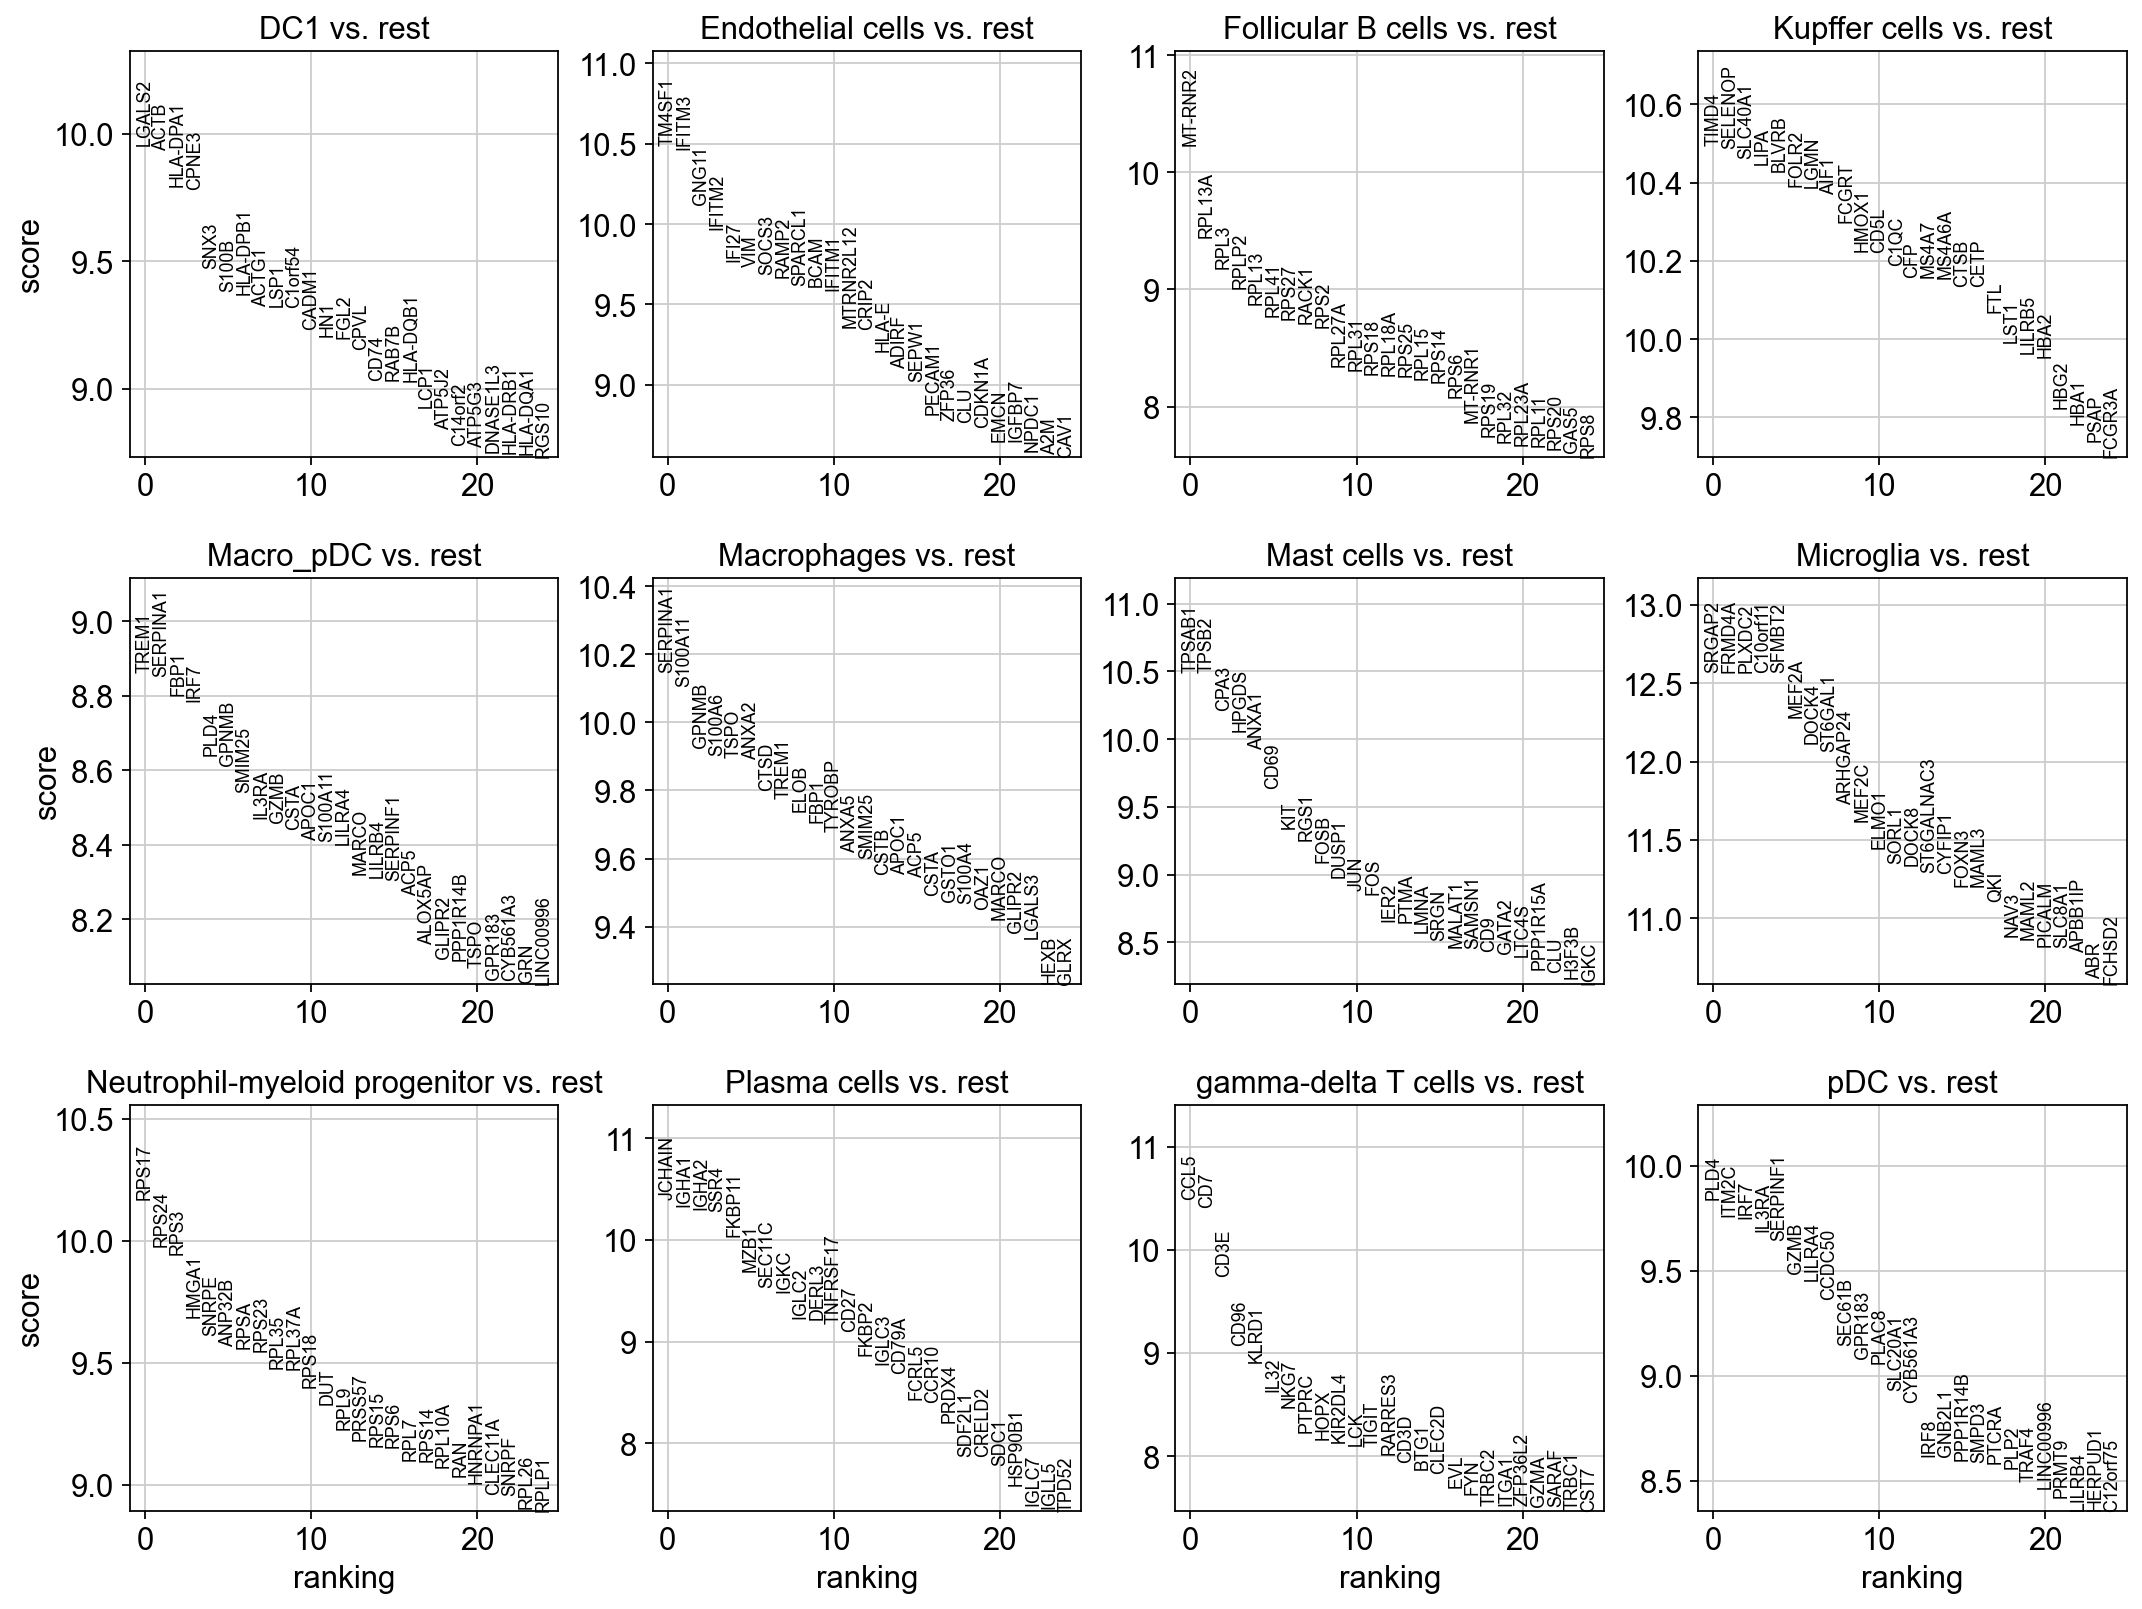

In [15]:
sc.pl.rank_genes_groups(adata, key = true_label_uns_ranked_key, n_genes = 25, sharey = False)  

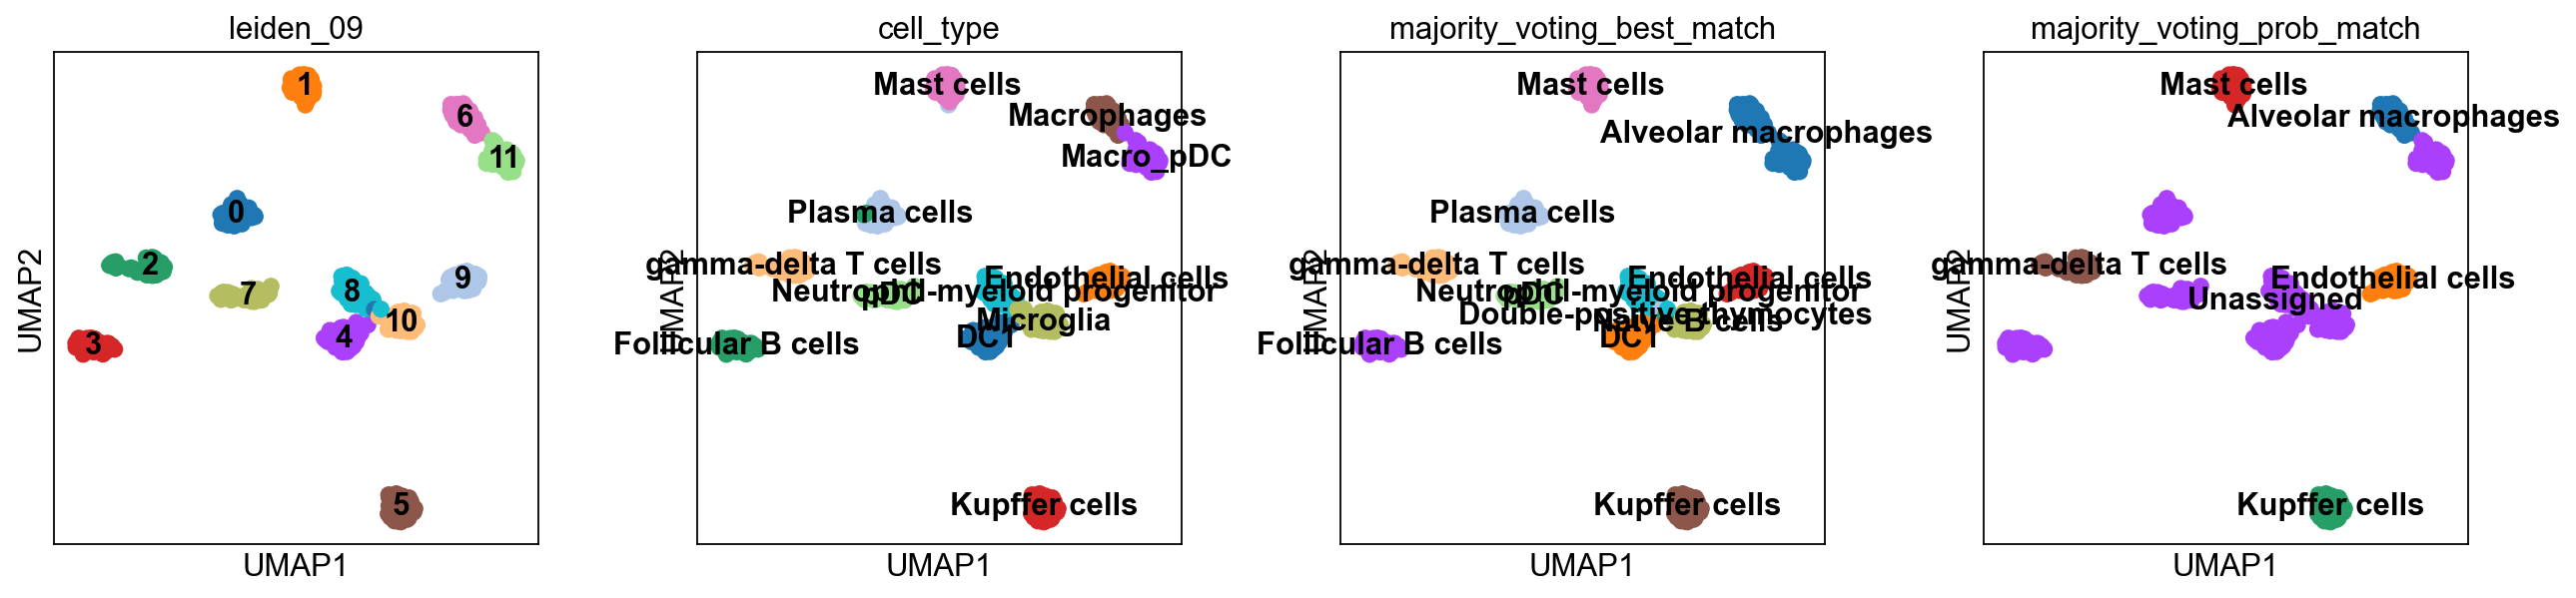

Number of CLusters inselected cluster key: leiden_09 is :12


In [16]:
sc.pl.umap(
    adata, 
    color       = [selected_obs_cluster_key, true_label_obs_cluster_key, 'majority_voting_best_match', 'majority_voting_prob_match',], 
    legend_loc  = "on data", 
    title       = [selected_obs_cluster_key, true_label_obs_cluster_key, 'majority_voting_best_match', 'majority_voting_prob_match',], 
    frameon     = True, 
    #save=".pdf"
)
print(f"Number of CLusters inselected cluster key: {selected_obs_cluster_key} is :{adata.obs[selected_obs_cluster_key].nunique()}")

#### `Ranked Genes (True Label)`

##### `Combination`

In [17]:
true_label_Combination_DF

,Plasma cells,gamma-delta T cells,Follicular B cells,DC1,Kupffer cells,Macrophages,pDC,Endothelial cells,Mast cells,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,"[6.496516227722168, JCHAIN]","[3.9321811199188232, CCL5]","[3.4722657203674316, MT-RNR2]","[2.4618544578552246, LGALS2]","[2.185464382171631, TIMD4]","[2.7772068977355957, SERPINA1]","[2.3506226539611816, PLD4]","[3.5498569011688232, TM4SF1]","[5.389334678649902, TPSAB1]","[4.027077674865723, RPS17]","[4.5022873878479, SRGAP2]","[1.034479022026062, TREM1]"
1,"[7.216111660003662, IGHA1]","[3.068100929260254, CD7]","[4.7200236320495605, RPL13A]","[5.273684501647949, ACTB]","[2.8507373332977295, SELENOP]","[3.7456793785095215, S100A11]","[2.539228916168213, ITM2C]","[3.753535032272339, IFITM3]","[5.156317710876465, TPSB2]","[4.253905773162842, RPS24]","[4.478425025939941, FRMD4A]","[2.153212070465088, SERPINA1]"
2,"[4.820352077484131, IGHA2]","[2.01381778717041, CD3E]","[4.3272175788879395, RPL3]","[4.290997505187988, HLA-DPA1]","[2.999174118041992, SLC40A1]","[1.7825987339019775, GPNMB]","[2.7985658645629883, IRF7]","[2.3163352012634277, GNG11]","[3.0026278495788574, CPA3]","[4.433751583099365, RPS3]","[4.28512716293335, PLXDC2]","[1.8453487157821655, FBP1]"
3,"[3.285065174102783, SSR4]","[1.6939525604248047, CD96]","[4.4580535888671875, RPLP2]","[1.679938554763794, CPNE3]","[3.1167471408843994, LIPA]","[4.0788373947143555, S100A6]","[2.005682945251465, IL3RA]","[2.8402628898620605, IFITM2]","[2.457197666168213, HPGDS]","[2.084681987762451, HMGA1]","[4.101098537445068, C10orf11]","[2.2347404956817627, IRF7]"
4,"[2.013909101486206, FKBP11]","[1.7035424709320068, KLRD1]","[4.602021217346191, RPL13]","[2.607694149017334, SNX3]","[2.5410046577453613, BLVRB]","[2.6854617595672607, TSPO]","[2.1048970222473145, SERPINF1]","[3.3270862102508545, IFI27]","[3.2366650104522705, ANXA1]","[2.0101916790008545, SNRPE]","[3.6890597343444824, SFMBT2]","[1.7672650814056396, PLD4]"
5,"[2.750776767730713, MZB1]","[2.4735491275787354, IL32]","[4.8144941329956055, RPL41]","[1.9697431325912476, S100B]","[2.421492576599121, FOLR2]","[2.873084545135498, ANXA2]","[3.0365936756134033, GZMB]","[4.337831020355225, VIM]","[3.4597415924072266, CD69]","[2.100961208343506, ANP32B]","[3.2405340671539307, MEF2A]","[1.260587453842163, GPNMB]"
6,"[1.8918119668960571, SEC11C]","[1.9176887273788452, NKG7]","[4.9346489906311035, RPS27]","[3.9581973552703857, HLA-DPB1]","[3.1219165325164795, LGMN]","[3.548046827316284, CTSD]","[2.249760150909424, LILRA4]","[2.4674527645111084, SOCS3]","[1.950173020362854, KIT]","[3.478876829147339, RPSA]","[4.012823104858398, DOCK4]","[1.102875828742981, SMIM25]"
7,"[5.782482147216797, IGKC]","[2.430889844894409, PTPRC]","[3.1254734992980957, RACK1]","[3.8590359687805176, ACTG1]","[3.2749857902526855, AIF1]","[1.5011613368988037, TREM1]","[2.263018846511841, CCDC50]","[2.354968547821045, RAMP2]","[3.5358633995056152, RGS1]","[4.494448661804199, RPS23]","[3.3755409717559814, ST6GAL1]","[1.5811116695404053, IL3RA]"
8,"[5.027541160583496, IGLC2]","[1.6459747552871704, HOPX]","[4.516481399536133, RPS2]","[2.568978786468506, LSP1]","[3.203280210494995, FCGRT]","[2.3011560440063477, ELOB]","[2.6884188652038574, SEC61B]","[3.1163010597229004, SPARCL1]","[2.8523993492126465, FOSB]","[3.828960418701172, RPL35]","[3.0705149173736572, ARHGAP24]","[2.4265289306640625, GZMB]"
9,"[1.8539708852767944, DERL3]","[1.318286657333374, KIR2DL4]","[4.090731620788574, RPL27A]","[1.8100850582122803, C1orf54]","[2.97369647026062, HMOX1]","[2.4277403354644775, FBP1]","[2.942777395248413, GPR183]","[2.1242787837982178, BCAM]","[3.4282379150390625, DUSP1]","[4.049456596374512, RPL37A]","[3.2560529708862305, MEF2C]","[1.102522611618042, CSTA]"


##### `Main`

In [18]:
true_label_Total_DF

,Cluster,Gene,Expression,P Value,P Value(Adj),Score
0,Plasma cells,JCHAIN,6.496516,2.343345e-25,2.715227e-21,10.405374
1,Plasma cells,IGHA1,7.216112,4.854644e-25,2.715227e-21,10.335776
2,Plasma cells,IGHA2,4.820352,7.016357e-25,2.715227e-21,10.300407
3,Plasma cells,SSR4,3.285065,7.899416e-25,2.715227e-21,10.288998
4,Plasma cells,FKBP11,2.013909,9.964900e-24,2.740148e-20,10.041985
...,...,...,...,...,...,...
5,Macro_pDC,GPNMB,1.260587,7.049447e-18,1.615381e-14,8.614098
6,Macro_pDC,SMIM25,1.102876,1.316690e-17,2.586168e-14,8.542218
7,Macro_pDC,IL3RA,1.581112,2.446791e-17,4.082154e-14,8.470340
8,Macro_pDC,GZMB,2.426529,2.672150e-17,4.082154e-14,8.460071


##### `Diversed`

In [19]:
true_label_topmarker_genes_DF

,Plasma cells,gamma-delta T cells,Follicular B cells,DC1,Kupffer cells,Macrophages,pDC,Endothelial cells,Mast cells,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,JCHAIN,CCL5,MT-RNR2,LGALS2,TIMD4,SERPINA1,PLD4,TM4SF1,TPSAB1,RPS17,SRGAP2,TREM1
1,IGHA1,CD7,RPL13A,ACTB,SELENOP,S100A11,ITM2C,IFITM3,TPSB2,RPS24,FRMD4A,SERPINA1
2,IGHA2,CD3E,RPL3,HLA-DPA1,SLC40A1,GPNMB,IRF7,GNG11,CPA3,RPS3,PLXDC2,FBP1
3,SSR4,CD96,RPLP2,CPNE3,LIPA,S100A6,IL3RA,IFITM2,HPGDS,HMGA1,C10orf11,IRF7
4,FKBP11,KLRD1,RPL13,SNX3,BLVRB,TSPO,SERPINF1,IFI27,ANXA1,SNRPE,SFMBT2,PLD4
5,MZB1,IL32,RPL41,S100B,FOLR2,ANXA2,GZMB,VIM,CD69,ANP32B,MEF2A,GPNMB
6,SEC11C,NKG7,RPS27,HLA-DPB1,LGMN,CTSD,LILRA4,SOCS3,KIT,RPSA,DOCK4,SMIM25
7,IGKC,PTPRC,RACK1,ACTG1,AIF1,TREM1,CCDC50,RAMP2,RGS1,RPS23,ST6GAL1,IL3RA
8,IGLC2,HOPX,RPS2,LSP1,FCGRT,ELOB,SEC61B,SPARCL1,FOSB,RPL35,ARHGAP24,GZMB
9,DERL3,KIR2DL4,RPL27A,C1orf54,HMOX1,FBP1,GPR183,BCAM,DUSP1,RPL37A,MEF2C,CSTA


#### `Ranked Genes (selected)`

##### `Combination`

In [20]:
selected_Combination_DF

,0,1,2,3,4,5,6,7,8,9,10,11
0,"[6.369182109832764, JCHAIN]","[5.1194939613342285, TPSB2]","[3.9321811199188232, CCL5]","[3.467294454574585, MT-RNR2]","[2.4618544578552246, LGALS2]","[2.185464382171631, TIMD4]","[2.7624025344848633, SERPINA1]","[2.372067451477051, PLD4]","[3.824317455291748, RPS17]","[3.5498569011688232, TM4SF1]","[4.308631896972656, PLXDC2]","[2.270555257797241, IRF7]"
1,"[7.077818393707275, IGHA1]","[5.3532538414001465, TPSAB1]","[3.068100929260254, CD7]","[4.770036697387695, RPL13A]","[5.273684501647949, ACTB]","[2.8507373332977295, SELENOP]","[3.737090587615967, S100A11]","[2.8419301509857178, IRF7]","[1.9991698265075684, HMGA1]","[3.753535032272339, IFITM3]","[3.2964868545532227, MEF2A]","[2.152775764465332, SERPINA1]"
2,"[4.783163547515869, IGHA2]","[2.9804527759552, CPA3]","[2.01381778717041, CD3E]","[4.5449981689453125, RPLP2]","[4.290997505187988, HLA-DPA1]","[2.999174118041992, SLC40A1]","[1.7762441635131836, GPNMB]","[2.556058168411255, ITM2C]","[4.276670455932617, RPS3]","[2.3163352012634277, GNG11]","[4.092073917388916, C10orf11]","[1.0203588008880615, TREM1]"
3,"[3.226113796234131, SSR4]","[2.4246602058410645, HPGDS]","[1.6939525604248047, CD96]","[5.068515777587891, RPS27]","[1.679938554763794, CPNE3]","[3.1167471408843994, LIPA]","[2.680046319961548, TSPO]","[2.0466017723083496, IL3RA]","[1.9170677661895752, SNRPE]","[2.8402628898620605, IFITM2]","[4.494583606719971, SRGAP2]","[1.861378788948059, FBP1]"
4,"[1.9832708835601807, FKBP11]","[3.2087814807891846, ANXA1]","[1.7035424709320068, KLRD1]","[4.881826877593994, RPL41]","[2.607694149017334, SNX3]","[2.5410046577453613, BLVRB]","[4.065012454986572, S100A6]","[2.1086857318878174, SERPINF1]","[4.037648677825928, RPS24]","[3.3270862102508545, IFI27]","[4.465293884277344, FRMD4A]","[1.7864272594451904, PLD4]"
5,"[2.7015600204467773, MZB1]","[3.4214980602264404, CD69]","[2.4735491275787354, IL32]","[4.646772384643555, RPL13]","[1.9697431325912476, S100B]","[2.421492576599121, FOLR2]","[2.859562397003174, ANXA2]","[3.0526652336120605, GZMB]","[2.0082051753997803, ANP32B]","[4.337831020355225, VIM]","[3.6463711261749268, SFMBT2]","[1.2538831233978271, GPNMB]"
6,"[1.8628325462341309, SEC11C]","[1.92753005027771, KIT]","[1.9176887273788452, NKG7]","[4.344152927398682, RPL3]","[3.9581973552703857, HLA-DPB1]","[3.1219165325164795, LGMN]","[1.5032105445861816, TREM1]","[2.2895047664642334, LILRA4]","[4.339800834655762, RPS23]","[2.4674527645111084, SOCS3]","[3.9965739250183105, DOCK4]","[1.6158639192581177, IL3RA]"
7,"[5.725003719329834, IGKC]","[3.5032191276550293, RGS1]","[2.430889844894409, PTPRC]","[4.565022945404053, RPS2]","[3.8590359687805176, ACTG1]","[3.2749857902526855, AIF1]","[3.535710334777832, CTSD]","[3.018233299255371, GPR183]","[1.7075495719909668, DUT]","[2.354968547821045, RAMP2]","[3.386211633682251, ST6GAL1]","[1.0957067012786865, SMIM25]"
8,"[1.8562570810317993, DERL3]","[2.8227999210357666, FOSB]","[1.6459747552871704, HOPX]","[4.170393943786621, RPL27A]","[2.568978786468506, LSP1]","[3.203280210494995, FCGRT]","[2.398287534713745, FBP1]","[2.272765874862671, CCDC50]","[3.3030147552490234, RPSA]","[3.1163010597229004, SPARCL1]","[3.173326253890991, DOCK8]","[2.4425251483917236, GZMB]"
9,"[1.0939178466796875, TNFRSF17]","[3.3982183933258057, DUSP1]","[1.318286657333374, KIR2DL4]","[3.834028482437134, RPL31]","[1.8100850582122803, C1orf54]","[2.97369647026062, HMOX1]","[2.2768499851226807, ELOB]","[2.6876018047332764, SEC61B]","[3.6419785022735596, RPL35]","[2.1242787837982178, BCAM]","[3.1170456409454346, ARHGAP24]","[1.1106470823287964, CSTA]"


##### `Main`

In [21]:
selected_Total_DF

,Cluster,Gene,Expression,P Value,P Value(Adj),Score
0,0,JCHAIN,6.369182,4.827086e-25,2.992878e-21,10.336322
1,0,IGHA1,7.077818,6.197949e-25,2.992878e-21,10.312331
2,0,IGHA2,4.783164,6.530390e-25,2.992878e-21,10.307309
3,0,SSR4,3.226114,3.549895e-24,1.220188e-20,10.143276
4,0,FKBP11,1.983271,1.021905e-23,2.810035e-20,10.039500
...,...,...,...,...,...,...
5,11,GPNMB,1.253883,2.284477e-17,5.234879e-14,8.478331
6,11,IL3RA,1.615864,2.926150e-17,5.747376e-14,8.449475
7,11,SMIM25,1.095707,4.298324e-17,7.387207e-14,8.404461
8,11,GZMB,2.442525,6.000432e-17,9.166660e-14,8.365217


##### `Diversed`

In [22]:
selected_topmarker_genes_DF

,0,1,2,3,4,5,6,7,8,9,10,11
0,JCHAIN,TPSB2,CCL5,MT-RNR2,LGALS2,TIMD4,SERPINA1,PLD4,RPS17,TM4SF1,PLXDC2,IRF7
1,IGHA1,TPSAB1,CD7,RPL13A,ACTB,SELENOP,S100A11,IRF7,HMGA1,IFITM3,MEF2A,SERPINA1
2,IGHA2,CPA3,CD3E,RPLP2,HLA-DPA1,SLC40A1,GPNMB,ITM2C,RPS3,GNG11,C10orf11,TREM1
3,SSR4,HPGDS,CD96,RPS27,CPNE3,LIPA,TSPO,IL3RA,SNRPE,IFITM2,SRGAP2,FBP1
4,FKBP11,ANXA1,KLRD1,RPL41,SNX3,BLVRB,S100A6,SERPINF1,RPS24,IFI27,FRMD4A,PLD4
5,MZB1,CD69,IL32,RPL13,S100B,FOLR2,ANXA2,GZMB,ANP32B,VIM,SFMBT2,GPNMB
6,SEC11C,KIT,NKG7,RPL3,HLA-DPB1,LGMN,TREM1,LILRA4,RPS23,SOCS3,DOCK4,IL3RA
7,IGKC,RGS1,PTPRC,RPS2,ACTG1,AIF1,CTSD,GPR183,DUT,RAMP2,ST6GAL1,SMIM25
8,DERL3,FOSB,HOPX,RPL27A,LSP1,FCGRT,FBP1,CCDC50,RPSA,SPARCL1,DOCK8,GZMB
9,TNFRSF17,DUSP1,KIR2DL4,RPL31,C1orf54,HMOX1,ELOB,SEC61B,RPL35,BCAM,ARHGAP24,CSTA


---
# `Annotation`

---
### `Prediction A`: Setup

In [23]:
from transformers import GPT2Tokenizer, GPT2Model
import torch
import numpy as np
from tqdm import tqdm

In [24]:
def get_gpt2_embedding(text, tokenizer, model):
    # Prepare the text input for GPT-2
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        # Generate the text embedding
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1)
    return embedding.cpu().numpy()  # Ensure numpy array and move to CPU

def predict_cell_type_nn(gene_expression, gene_marker, tokenizer, model, prediction_model, encoder=None):
    # Generate the embedding for the provided gene marker
    gene_marker_embedding = get_gpt2_embedding("Unknown " + gene_marker, tokenizer, model)
    
    # gene_marker_embedding is already a flattened numpy array from get_gpt2_embedding
    gene_marker_embedding_flat = gene_marker_embedding.flatten()
    
    # The model expects two inputs: gene expression and text embedding
    # Prepare the gene expression data
    gene_expression_array = np.array([[gene_expression]])  # Ensure it's 2D to match the embedding's dimensionality
    
    # Predict using the model
    # Note: Adjust the predict call according to how your model expects inputs
    prediction = prediction_model.predict([gene_expression_array, np.array([gene_marker_embedding_flat])])
    
    # Decode the prediction if an encoder is provided
    if encoder is not None:
        predicted_label = encoder.inverse_transform([np.argmax(prediction)])
        return predicted_label[0]
    else:
        return prediction

In [25]:
tokenizer_GPT2 = GPT2Tokenizer.from_pretrained('gpt2')
model_GPT2     = GPT2Model.from_pretrained('gpt2')
tokenizer_GPT2.pad_token = tokenizer_GPT2.eos_token  # Necessary for padding

---
### `Prediction A`: Target

In [26]:
gene_expression = 6.4965
gene_marker     = "JCHAIN"

---
##### `Model Selection:` Neural Network

---
### `Prediction B`: Setup
- SVM
- SGD
- DT
- RF
- GB

---
##### `BERT`

In [29]:
def get_bert_embedding(text, tokenizer, embedding_model):
    """
    Generate the text embedding using BERT model.
    """
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = embedding_model(**inputs)
        # Use the pooler_output for a summarized representation of the entire text sequence
        embedding = outputs.pooler_output
    return embedding.cpu().numpy()  # Ensure numpy array and move to CPU


In [30]:
def predict_cell_type_BERT_normal(gene_expression, gene_marker, tokenizer, embedding_model, prediction_model, encoder=None):
    """
    Predict the cell type using an SVM model based on gene expression and gene marker embedding from BERT.
    """
    # Generate the embedding for the provided gene marker
    gene_marker_embedding = get_bert_embedding("Unknown " + gene_marker, tokenizer, embedding_model)
    
    # Flatten the embedding to match the expected input shape for SVM
    gene_marker_embedding_flat = gene_marker_embedding.flatten()
    
    # Prepare the gene expression data to match the dimensionality
    gene_expression_array = np.array([[gene_expression]])  # Ensure it's 2D
    
    # Combine gene expression and text embedding for SVM input
    combined_input = np.hstack([gene_expression_array, gene_marker_embedding_flat.reshape(1, -1)])
    
    # Predict using the SVM model
    prediction = prediction_model.predict(combined_input)
    
    # Decode the prediction if an encoder is provided
    if encoder is not None:
        predicted_label = encoder.inverse_transform(prediction)
        return predicted_label[0]
    else:
        return prediction[0]


---
##### `GPT2`

In [31]:
def get_gpt2_embedding(text, tokenizer, embedding_model):
    """
    Generate the text embedding using GPT-2 model.
    """
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = embedding_model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1)
    return embedding.cpu().numpy()  # Ensure numpy array and move to CPU


In [32]:
def predict_cell_type_GPT2_normal(gene_expression, gene_marker, tokenizer, embedding_model, prediction_model, encoder=None):
    """
    Predict the cell type using an SVM model based on gene expression and gene marker embedding.
    """
    # Generate the embedding for the provided gene marker
    gene_marker_embedding = get_gpt2_embedding("Unknown " + gene_marker, tokenizer, embedding_model)
    
    # Flatten the embedding to match the expected input shape for SVM
    gene_marker_embedding_flat = gene_marker_embedding.flatten()
    
    # Prepare the gene expression data to match the dimensionality
    gene_expression_array = np.array([[gene_expression]])  # Ensure it's 2D
    
    # Combine gene expression and text embedding for SVM input
    combined_input = np.hstack([gene_expression_array, gene_marker_embedding_flat.reshape(1, -1)])
    
    # Predict using the SVM model
    prediction = prediction_model.predict(combined_input)
    
    # Decode the prediction if an encoder is provided
    if encoder is not None:
        predicted_label = encoder.inverse_transform(prediction)
        return predicted_label[0]
    else:
        return prediction[0] 

---
##### `GPT3`

In [33]:
def get_gpt3_embedding(text):
    response = openai.Embedding.create(
      input=text,
      engine="text-embedding-ada-002"  # Choose the appropriate engine
    )
    embedding = response['data'][0]['embedding']
    return np.array(embedding)


In [34]:
def predict_cell_type_GPT3_normal(gene_expression, gene_marker, tokenizer = "tokenizer_GPT3", embedding_model = "model_GPT3",  prediction_model = None,  encoder=None):
    """
    Predict the cell type using an SVM model based on gene expression and gene marker embedding from GPT-3.
    """
    
    gene_expression_array = np.array([[gene_expression]])  # 2D array

    # Prefix "Unknown" is added to the gene marker before generating the embedding
    gene_marker_embedding    = get_gpt3_embedding("Unknown " + gene_marker)
    gene_marker_embedding_2d = gene_marker_embedding.reshape(1, -1)  

    # Combine gene expression and text embedding for SVM input
    combined_input = np.hstack([gene_expression_array, gene_marker_embedding_2d])

    # Predict using the SVM model
    prediction = prediction_model.predict(combined_input)
    
    # Decode the prediction if an encoder is provided
    if encoder is not None:
        predicted_label = encoder.inverse_transform(prediction)
        return predicted_label[0]
    else:
        return prediction[0]


---
##### `Tokenizers`
- BERT
- GPT2
- GPT3 (Nonexist)

In [35]:
from transformers import BertTokenizer, BertModel

tokenizer_BERT = BertTokenizer.from_pretrained('bert-base-uncased')
model_BERT     = BertModel.from_pretrained('bert-base-uncased')

In [36]:
from transformers import GPT2Tokenizer, GPT2Model

tokenizer_GPT2 = GPT2Tokenizer.from_pretrained('gpt2')
model_GPT2     = GPT2Model.from_pretrained('gpt2')
tokenizer_GPT2.pad_token = tokenizer_GPT2.eos_token  # Necessary for padding

---
#### `Prediction:` SVM

In [ ]:
SVM_Models.sort_values(by = ["process", "accuracy"], ascending = [True, False], inplace = False)   

,process,model_type,accuracy,applications_condition,applications,model,encoder
ff54cf6e_81fb,process_2_BERT,SVM,0.7,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
8d8ff70a_e03b,process_2_BERT,SVM,0.3,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
1b7c9047_b373,process_2_BERT,SVM,0.1,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
e7e61604_2b93,process_2_BERT,SVM,0.1,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
92847c69_0e33,process_2_GPT2,SVM,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
ca6caee3_2164,process_2_GPT2,SVM,0.575342,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
601fe9c3_1663,process_2_GPT2,SVM,0.520548,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
0e4a3113_f8f3,process_2_GPT2,SVM,0.363014,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
eff5aa7f_9e87,process_2_GPT3,SVM,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
1e5d81bd_f217,process_2_GPT3,SVM,0.944056,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None


In [ ]:
SVM_Models_P2_BERT  = SVM_Models[SVM_Models["process"].str.contains("process_2_BERT")]
SVM_Models_P2_BERT  = SVM_Models_P2_BERT[SVM_Models_P2_BERT["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
SVM_Model_P2_BERT    = SVM_Models_P2_BERT.iloc[0]["model"] 

SVM_Models_P2_GPT2  = SVM_Models[SVM_Models["process"].str.contains("process_2_GPT2")] 
SVM_Models_P2_GPT2  = SVM_Models_P2_GPT2[SVM_Models_P2_GPT2["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
SVM_Model_P2_GPT2    = SVM_Models_P2_GPT2.iloc[0]["model"]

SVM_Models_P2_GPT3  = SVM_Models[SVM_Models["process"].str.contains("process_2_GPT3")] 
SVM_Models_P2_GPT3  = SVM_Models_P2_GPT3[SVM_Models_P2_GPT3["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
SVM_Model_P2_GPT3    = SVM_Models_P2_GPT3.iloc[0]["model"]

In [ ]:
# SVM_Model_P2_BERT 
# SVM_Model_P2_GPT2
# SVM_Model_P2_GPT3 
predicted_cell_type_SVM_BERT = predict_cell_type_BERT_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = tokenizer_BERT,    embedding_model = model_BERT, 
                                                             prediction_model = SVM_Model_P2_BERT, encoder         = None) 
predicted_cell_type_SVM_GPT2 = predict_cell_type_GPT2_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = tokenizer_GPT2,    embedding_model = model_GPT2, 
                                                             prediction_model = SVM_Model_P2_GPT2, encoder         = None) 
predicted_cell_type_SVM_GPT3 = predict_cell_type_GPT3_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = "tokenizer_GPT3",  embedding_model = "model_GPT3", 
                                                             prediction_model = SVM_Model_P2_GPT3, encoder         = None) 

print("Predicted Cell Type: (BERT)", predicted_cell_type_SVM_BERT)
print("Predicted Cell Type: (GPT2)", predicted_cell_type_SVM_GPT2)
print("Predicted Cell Type: (GPT3)", predicted_cell_type_SVM_GPT3) 

Predicted Cell Type: (BERT) DC1
Predicted Cell Type: (GPT2) Macro_pDC
Predicted Cell Type: (GPT3) Plasma


---
##### `SVM:`  | BERT

In [ ]:
predictions_P2_BERT_SVM_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_BERT_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = tokenizer_BERT, 
            embedding_model = model_BERT, 
            prediction_model= SVM_Model_P2_BERT, 
            encoder         = None
        )
        predictions_P2_BERT_SVM_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_BERT_SVM = pd.DataFrame(predictions_P2_BERT_SVM_Dict)

predictions_P2_BERT_SVM.columns = [ i.replace("cells", "") for i in predictions_P2_BERT_SVM.columns] 
predictions_P2_BERT_SVM.columns = [ i.strip() for i in predictions_P2_BERT_SVM.columns]  
predictions_P2_BERT_SVM

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,DC1,Plasma,gamma-delta T,DC1,DC1,Plasma,Plasma,Plasma,DC1,Plasma,DC1,DC1
1,Plasma,Plasma,DC1,Plasma,Plasma,Plasma,DC1,Plasma,Plasma,DC1,DC1,Plasma
2,Plasma,DC1,Plasma,gamma-delta T,DC1,gamma-delta T,DC1,DC1,DC1,Plasma,Plasma,Plasma
3,Plasma,DC1,Plasma,DC1,Plasma,DC1,DC1,DC1,DC1,Plasma,Plasma,DC1
4,DC1,DC1,DC1,DC1,gamma-delta T,DC1,DC1,DC1,Plasma,DC1,DC1,Plasma
5,Plasma,DC1,Plasma,DC1,DC1,Plasma,DC1,DC1,Plasma,DC1,DC1,gamma-delta T
6,Plasma,DC1,DC1,gamma-delta T,DC1,Plasma,Plasma,Plasma,Plasma,DC1,Plasma,DC1
7,Plasma,DC1,Plasma,Plasma,Plasma,DC1,gamma-delta T,Plasma,Plasma,Plasma,DC1,DC1
8,Plasma,Plasma,Plasma,Plasma,DC1,Plasma,DC1,Plasma,Plasma,DC1,Plasma,DC1
9,Plasma,Plasma,DC1,Plasma,Plasma,Plasma,DC1,DC1,Plasma,DC1,DC1,gamma-delta T


In [ ]:
# Example usage:
predictions_P2_BERT_SVM_Processor   = PredictionProcessor(predictions_df = predictions_P2_BERT_SVM)
predictions_P2_BERT_SVM_Annotation  = predictions_P2_BERT_SVM_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9


In [ ]:
Annotations_P2_BERT_SVM = pd.DataFrame.from_dict(predictions_P2_BERT_SVM_Annotation, orient = "index").T  
Annotations_P2_BERT_SVM 

,Plasma,pDC,Macro_pDC
0,Plasma,DC1,gamma-delta T


---
##### `SVM:`  | GPT2

In [ ]:
predictions_P2_GPT2_SVM_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_GPT2_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = tokenizer_GPT2, 
            embedding_model = model_GPT2, 
            prediction_model= SVM_Model_P2_GPT2, 
            encoder         = None
        )
        predictions_P2_GPT2_SVM_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_GPT2_SVM = pd.DataFrame(predictions_P2_GPT2_SVM_Dict)

predictions_P2_GPT2_SVM.columns = [ i.replace("cells", "") for i in predictions_P2_GPT2_SVM.columns] 
predictions_P2_GPT2_SVM.columns = [ i.strip() for i in predictions_P2_GPT2_SVM.columns]  
predictions_P2_GPT2_SVM

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,Macro_pDC,Macro_pDC,Mast,Macro_pDC,Macro_pDC,Endothelial,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC
1,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial
2,Endothelial,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Endothelial,Macro_pDC
3,Macro_pDC,Macro_pDC,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC
4,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Mast,Endothelial,Endothelial,Endothelial,Endothelial
5,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC
6,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC
7,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Mast,Macro_pDC
8,Endothelial,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC
9,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC


In [ ]:
# Example usage:
predictions_P2_GPT2_SVM_Processor   = PredictionProcessor(predictions_df = predictions_P2_GPT2_SVM)
predictions_P2_GPT2_SVM_Annotation  = predictions_P2_GPT2_SVM_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9


In [ ]:
Annotations_P2_GPT2_SVM = pd.DataFrame.from_dict(predictions_P2_GPT2_SVM_Annotation, orient = "index").T  
Annotations_P2_GPT2_SVM 

,Mast,Microglia,Follicular B
0,Macro_pDC,Endothelial,Mast


---
##### `SVM:`  | GPT3

In [ ]:
predictions_P2_GPT3_SVM_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_GPT3_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = "tokenizer_GPT3", 
            embedding_model = "model_GPT3", 
            prediction_model= SVM_Model_P2_GPT3, 
            encoder         = None
        )
        predictions_P2_GPT3_SVM_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_GPT3_SVM = pd.DataFrame(predictions_P2_GPT3_SVM_Dict)

predictions_P2_GPT3_SVM.columns = [ i.replace("cells", "") for i in predictions_P2_GPT3_SVM.columns] 
predictions_P2_GPT3_SVM.columns = [ i.strip() for i in predictions_P2_GPT3_SVM.columns]  
predictions_P2_GPT3_SVM

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,Plasma,Mast,Neutrophil-myeloid progenitor,pDC,pDC,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
1,Plasma,DC1,Follicular B,Follicular B,Kupffer,DC1,pDC,Endothelial,Mast,Mast,Plasma,Macro_pDC
2,Plasma,gamma-delta T,Follicular B,Mast,Kupffer,Macro_pDC,pDC,pDC,DC1,Mast,Microglia,Macro_pDC
3,Macrophages,Macro_pDC,Follicular B,Macro_pDC,Kupffer,Mast,Macro_pDC,pDC,pDC,Macro_pDC,Microglia,pDC
4,Macro_pDC,Macro_pDC,Follicular B,pDC,pDC,Kupffer,Macro_pDC,Endothelial,Macrophages,Macro_pDC,Endothelial,Macro_pDC
5,pDC,pDC,Follicular B,Macro_pDC,pDC,Macrophages,Macrophages,Microglia,Mast,Macro_pDC,Macrophages,Macro_pDC
6,Macro_pDC,Macro_pDC,Follicular B,DC1,Macrophages,DC1,pDC,pDC,Macro_pDC,Neutrophil-myeloid progenitor,Mast,Macro_pDC
7,Plasma,pDC,DC1,DC1,DC1,Macro_pDC,pDC,pDC,Neutrophil-myeloid progenitor,Follicular B,Macrophages,Macro_pDC
8,Microglia,Macro_pDC,Mast,pDC,DC1,pDC,pDC,DC1,Kupffer,Neutrophil-myeloid progenitor,Macrophages,pDC
9,Macro_pDC,Macro_pDC,Follicular B,Macro_pDC,Macrophages,pDC,Macrophages,Macro_pDC,DC1,Follicular B,DC1,Macro_pDC


In [ ]:
# Example usage:
predictions_P2_GPT3_SVM_Processor   = PredictionProcessor(predictions_df = predictions_P2_GPT3_SVM)
predictions_P2_GPT3_SVM_Annotation  = predictions_P2_GPT3_SVM_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9
Remaining columns: 8
Remaining columns: 7
Remaining columns: 6
Remaining columns: 5
Remaining columns: 4
Remaining columns: 3
Remaining columns: 2
Remaining columns: 1


In [ ]:
Annotations_P2_GPT3_SVM = pd.DataFrame.from_dict(predictions_P2_GPT3_SVM_Annotation, orient = "index").T  
Annotations_P2_GPT3_SVM 

,Macro_pDC,Follicular B,pDC,Plasma,Kupffer,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,DC1,Macrophages,gamma-delta T
0,Macro_pDC,Follicular B,pDC,Plasma,Kupffer,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,DC1,Macrophages,gamma-delta T


---
---
### `Prediction B`: Target

In [37]:
gene_expression = 6.4965
gene_marker     = "JCHAIN"

In [38]:
operation = access_data_path(target_folder = f"process_3/functions/{folder_s3_find}", target_file = "tool.ipynb")     
%run $operation  

---
#### `Prediction:` SVM

In [39]:
SVM_Models.sort_values(by = ["process", "accuracy"], ascending = [True, False], inplace = False)   

,process,model_type,accuracy,applications_condition,applications,model,encoder
ff54cf6e_81fb,process_2_BERT,SVM,0.7,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
8d8ff70a_e03b,process_2_BERT,SVM,0.3,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
1b7c9047_b373,process_2_BERT,SVM,0.1,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
e7e61604_2b93,process_2_BERT,SVM,0.1,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
92847c69_0e33,process_2_GPT2,SVM,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
ca6caee3_2164,process_2_GPT2,SVM,0.575342,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
601fe9c3_1663,process_2_GPT2,SVM,0.520548,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
0e4a3113_f8f3,process_2_GPT2,SVM,0.363014,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
eff5aa7f_9e87,process_2_GPT3,SVM,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None
1e5d81bd_f217,process_2_GPT3,SVM,0.944056,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SVC(C=1, coef0=0.5, degree=2, kernel='poly', r...",None


In [40]:
SVM_Models_P2_BERT  = SVM_Models[SVM_Models["process"].str.contains("process_2_BERT")]
SVM_Models_P2_BERT  = SVM_Models_P2_BERT[SVM_Models_P2_BERT["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
SVM_Model_P2_BERT    = SVM_Models_P2_BERT.iloc[0]["model"] 

SVM_Models_P2_GPT2  = SVM_Models[SVM_Models["process"].str.contains("process_2_GPT2")] 
SVM_Models_P2_GPT2  = SVM_Models_P2_GPT2[SVM_Models_P2_GPT2["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
SVM_Model_P2_GPT2    = SVM_Models_P2_GPT2.iloc[0]["model"]

SVM_Models_P2_GPT3  = SVM_Models[SVM_Models["process"].str.contains("process_2_GPT3")] 
SVM_Models_P2_GPT3  = SVM_Models_P2_GPT3[SVM_Models_P2_GPT3["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
SVM_Model_P2_GPT3    = SVM_Models_P2_GPT3.iloc[0]["model"]

In [41]:
# SVM_Model_P2_BERT 
# SVM_Model_P2_GPT2
# SVM_Model_P2_GPT3 
predicted_cell_type_SVM_BERT = predict_cell_type_BERT_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = tokenizer_BERT,    embedding_model = model_BERT, 
                                                             prediction_model = SVM_Model_P2_BERT, encoder         = None) 
predicted_cell_type_SVM_GPT2 = predict_cell_type_GPT2_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = tokenizer_GPT2,    embedding_model = model_GPT2, 
                                                             prediction_model = SVM_Model_P2_GPT2, encoder         = None) 
predicted_cell_type_SVM_GPT3 = predict_cell_type_GPT3_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = "tokenizer_GPT3",  embedding_model = "model_GPT3", 
                                                             prediction_model = SVM_Model_P2_GPT3, encoder         = None) 

print("Predicted Cell Type: (BERT)", predicted_cell_type_SVM_BERT)
print("Predicted Cell Type: (GPT2)", predicted_cell_type_SVM_GPT2)
print("Predicted Cell Type: (GPT3)", predicted_cell_type_SVM_GPT3) 

Predicted Cell Type: (BERT) DC1
Predicted Cell Type: (GPT2) Macro_pDC
Predicted Cell Type: (GPT3) Plasma


---
##### `SVM:`  | BERT

In [42]:
predictions_P2_BERT_SVM_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_BERT_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = tokenizer_BERT, 
            embedding_model = model_BERT, 
            prediction_model= SVM_Model_P2_BERT, 
            encoder         = None
        )
        predictions_P2_BERT_SVM_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_BERT_SVM = pd.DataFrame(predictions_P2_BERT_SVM_Dict)

predictions_P2_BERT_SVM.columns = [ i.replace("cells", "") for i in predictions_P2_BERT_SVM.columns] 
predictions_P2_BERT_SVM.columns = [ i.strip() for i in predictions_P2_BERT_SVM.columns]  
predictions_P2_BERT_SVM

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,DC1,Plasma,gamma-delta T,DC1,DC1,Plasma,Plasma,Plasma,DC1,Plasma,DC1,DC1
1,Plasma,Plasma,DC1,Plasma,Plasma,Plasma,DC1,Plasma,Plasma,DC1,DC1,Plasma
2,Plasma,DC1,Plasma,gamma-delta T,DC1,gamma-delta T,DC1,DC1,DC1,Plasma,Plasma,Plasma
3,Plasma,DC1,Plasma,DC1,Plasma,DC1,DC1,DC1,DC1,Plasma,Plasma,DC1
4,DC1,DC1,DC1,DC1,gamma-delta T,DC1,DC1,DC1,Plasma,DC1,DC1,Plasma
5,Plasma,DC1,Plasma,DC1,DC1,Plasma,DC1,DC1,Plasma,DC1,DC1,gamma-delta T
6,Plasma,DC1,DC1,gamma-delta T,DC1,Plasma,Plasma,Plasma,Plasma,DC1,Plasma,DC1
7,Plasma,DC1,Plasma,Plasma,Plasma,DC1,gamma-delta T,Plasma,Plasma,Plasma,DC1,DC1
8,Plasma,Plasma,Plasma,Plasma,DC1,Plasma,DC1,Plasma,Plasma,DC1,Plasma,DC1
9,Plasma,Plasma,DC1,Plasma,Plasma,Plasma,DC1,DC1,Plasma,DC1,DC1,gamma-delta T


In [43]:
# Example usage:
predictions_P2_BERT_SVM_Processor   = PredictionProcessor(predictions_df = predictions_P2_BERT_SVM)
predictions_P2_BERT_SVM_Annotation  = predictions_P2_BERT_SVM_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9


In [44]:
Annotations_P2_BERT_SVM = pd.DataFrame.from_dict(predictions_P2_BERT_SVM_Annotation, orient = "index").T  
Annotations_P2_BERT_SVM 

,Plasma,pDC,Macro_pDC
0,Plasma,DC1,gamma-delta T


---
##### `SVM:`  | GPT2

In [45]:
predictions_P2_GPT2_SVM_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_GPT2_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = tokenizer_GPT2, 
            embedding_model = model_GPT2, 
            prediction_model= SVM_Model_P2_GPT2, 
            encoder         = None
        )
        predictions_P2_GPT2_SVM_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_GPT2_SVM = pd.DataFrame(predictions_P2_GPT2_SVM_Dict)

predictions_P2_GPT2_SVM.columns = [ i.replace("cells", "") for i in predictions_P2_GPT2_SVM.columns] 
predictions_P2_GPT2_SVM.columns = [ i.strip() for i in predictions_P2_GPT2_SVM.columns]  
predictions_P2_GPT2_SVM

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,Macro_pDC,Macro_pDC,Mast,Macro_pDC,Macro_pDC,Endothelial,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC
1,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial
2,Endothelial,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Endothelial,Macro_pDC
3,Macro_pDC,Macro_pDC,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC
4,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Mast,Endothelial,Endothelial,Endothelial,Endothelial
5,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC
6,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC
7,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Mast,Macro_pDC
8,Endothelial,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC
9,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC


In [46]:
# Example usage:
predictions_P2_GPT2_SVM_Processor   = PredictionProcessor(predictions_df = predictions_P2_GPT2_SVM)
predictions_P2_GPT2_SVM_Annotation  = predictions_P2_GPT2_SVM_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9


In [47]:
Annotations_P2_GPT2_SVM = pd.DataFrame.from_dict(predictions_P2_GPT2_SVM_Annotation, orient = "index").T  
Annotations_P2_GPT2_SVM 

,Mast,Microglia,Follicular B
0,Macro_pDC,Endothelial,Mast


---
##### `SVM:`  | GPT3

In [48]:
predictions_P2_GPT3_SVM_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_GPT3_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = "tokenizer_GPT3", 
            embedding_model = "model_GPT3", 
            prediction_model= SVM_Model_P2_GPT3, 
            encoder         = None
        )
        predictions_P2_GPT3_SVM_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_GPT3_SVM = pd.DataFrame(predictions_P2_GPT3_SVM_Dict)

predictions_P2_GPT3_SVM.columns = [ i.replace("cells", "") for i in predictions_P2_GPT3_SVM.columns] 
predictions_P2_GPT3_SVM.columns = [ i.strip() for i in predictions_P2_GPT3_SVM.columns]  
predictions_P2_GPT3_SVM

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,Plasma,Mast,Neutrophil-myeloid progenitor,pDC,pDC,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
1,Plasma,DC1,Follicular B,Follicular B,Kupffer,DC1,pDC,Endothelial,Mast,Mast,Plasma,Macro_pDC
2,Plasma,gamma-delta T,Follicular B,Mast,Kupffer,Macro_pDC,pDC,pDC,DC1,Mast,Microglia,Macro_pDC
3,Macrophages,Macro_pDC,Follicular B,Macro_pDC,Kupffer,Mast,Macro_pDC,pDC,pDC,Macro_pDC,Microglia,pDC
4,Macro_pDC,Macro_pDC,Follicular B,pDC,pDC,Kupffer,Macro_pDC,Endothelial,Macrophages,Macro_pDC,Endothelial,Macro_pDC
5,pDC,pDC,Follicular B,Macro_pDC,pDC,Macrophages,Macrophages,Microglia,Mast,Macro_pDC,Macrophages,Macro_pDC
6,Macro_pDC,Macro_pDC,Follicular B,DC1,Macrophages,DC1,pDC,pDC,Macro_pDC,Neutrophil-myeloid progenitor,Mast,Macro_pDC
7,Plasma,pDC,DC1,DC1,DC1,Macro_pDC,pDC,pDC,Neutrophil-myeloid progenitor,Follicular B,Macrophages,Macro_pDC
8,Microglia,Macro_pDC,Mast,pDC,DC1,pDC,pDC,DC1,Kupffer,Neutrophil-myeloid progenitor,Macrophages,pDC
9,Macro_pDC,Macro_pDC,Follicular B,Macro_pDC,Macrophages,pDC,Macrophages,Macro_pDC,DC1,Follicular B,DC1,Macro_pDC


In [49]:
# Example usage:
predictions_P2_GPT3_SVM_Processor   = PredictionProcessor(predictions_df = predictions_P2_GPT3_SVM)
predictions_P2_GPT3_SVM_Annotation  = predictions_P2_GPT3_SVM_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9
Remaining columns: 8
Remaining columns: 7
Remaining columns: 6
Remaining columns: 5
Remaining columns: 4
Remaining columns: 3
Remaining columns: 2
Remaining columns: 1


In [50]:
Annotations_P2_GPT3_SVM = pd.DataFrame.from_dict(predictions_P2_GPT3_SVM_Annotation, orient = "index").T  
Annotations_P2_GPT3_SVM 

,Macro_pDC,Follicular B,pDC,Plasma,Kupffer,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,DC1,Macrophages,gamma-delta T
0,Macro_pDC,Follicular B,pDC,Plasma,Kupffer,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,DC1,Macrophages,gamma-delta T


---
#### `Prediction:` SGD

In [51]:
SGD_Models.sort_values(by = ["process", "accuracy"], ascending = [True, False], inplace = False)   

,process,model_type,accuracy,applications_condition,applications,model,encoder
7bdb1dc7_a435,process_2_BERT,SGD,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
9a83e717_044d,process_2_BERT,SGD,0.6,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
9da2483d_4d9d,process_2_BERT,SGD,0.2,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
6103eb2f_ae70,process_2_BERT,SGD,0.1,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
65b65cb0_b236,process_2_GPT2,SGD,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
dc999826_551b,process_2_GPT2,SGD,0.513699,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
b8c7c753_12e4,process_2_GPT2,SGD,0.5,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
28b90519_b689,process_2_GPT2,SGD,0.465753,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
5e440d4b_7962,process_2_GPT3,SGD,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None
ec098d57_a4ce,process_2_GPT3,SGD,0.972028,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"SGDClassifier(alpha=0.01, random_state=42, tol...",None


In [52]:
SGD_Models_P2_BERT  = SGD_Models[SGD_Models["process"].str.contains("process_2_BERT")]
SGD_Models_P2_BERT  = SGD_Models_P2_BERT[SGD_Models_P2_BERT["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
SGD_Model_P2_BERT    = SGD_Models_P2_BERT.iloc[0]["model"] 

SGD_Models_P2_GPT2  = SGD_Models[SGD_Models["process"].str.contains("process_2_GPT2")] 
SGD_Models_P2_GPT2  = SGD_Models_P2_GPT2[SGD_Models_P2_GPT2["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
SGD_Model_P2_GPT2    = SGD_Models_P2_GPT2.iloc[0]["model"]

SGD_Models_P2_GPT3  = SGD_Models[SGD_Models["process"].str.contains("process_2_GPT3")] 
SGD_Models_P2_GPT3  = SGD_Models_P2_GPT3[SGD_Models_P2_GPT3["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
SGD_Model_P2_GPT3    = SGD_Models_P2_GPT3.iloc[0]["model"]

In [53]:
# SGD_Model_P2_BERT 
# SGD_Model_P2_GPT2
# SGD_Model_P2_GPT3 
predicted_cell_type_SGD_BERT = predict_cell_type_BERT_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = tokenizer_BERT,    embedding_model = model_BERT, 
                                                             prediction_model = SGD_Model_P2_BERT, encoder         = None) 
predicted_cell_type_SGD_GPT2 = predict_cell_type_GPT2_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = tokenizer_GPT2,    embedding_model = model_GPT2, 
                                                             prediction_model = SGD_Model_P2_GPT2, encoder         = None) 
predicted_cell_type_SGD_GPT3 = predict_cell_type_GPT3_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = "tokenizer_GPT3",  embedding_model = "model_GPT3", 
                                                             prediction_model = SGD_Model_P2_GPT3, encoder         = None) 

print("Predicted Cell Type: (BERT)", predicted_cell_type_SGD_BERT)
print("Predicted Cell Type: (GPT2)", predicted_cell_type_SGD_GPT2)
print("Predicted Cell Type: (GPT3)", predicted_cell_type_SGD_GPT3) 

Predicted Cell Type: (BERT) DC1
Predicted Cell Type: (GPT2) pDC
Predicted Cell Type: (GPT3) Macro_pDC


---
##### `SGD:`  | BERT

In [54]:
predictions_P2_BERT_SGD_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_BERT_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = tokenizer_BERT, 
            embedding_model = model_BERT, 
            prediction_model= SGD_Model_P2_BERT, 
            encoder         = None
        )
        predictions_P2_BERT_SGD_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_BERT_SGD = pd.DataFrame(predictions_P2_BERT_SGD_Dict)

predictions_P2_BERT_SGD.columns = [ i.replace("cells", "") for i in predictions_P2_BERT_SGD.columns] 
predictions_P2_BERT_SGD.columns = [ i.strip() for i in predictions_P2_BERT_SGD.columns]  
predictions_P2_BERT_SGD

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,DC1,DC1,DC1,DC1,DC1,Plasma,DC1,DC1,DC1,Plasma,DC1,DC1
1,DC1,DC1,DC1,DC1,Plasma,DC1,DC1,DC1,Plasma,DC1,DC1,Plasma
2,DC1,DC1,Plasma,DC1,DC1,gamma-delta T,DC1,DC1,DC1,Plasma,DC1,DC1
3,Plasma,DC1,Plasma,DC1,Plasma,DC1,DC1,DC1,DC1,DC1,Plasma,DC1
4,DC1,DC1,DC1,DC1,DC1,DC1,DC1,DC1,Plasma,DC1,DC1,DC1
5,DC1,DC1,DC1,DC1,DC1,Plasma,DC1,DC1,DC1,DC1,DC1,gamma-delta T
6,DC1,DC1,DC1,DC1,DC1,DC1,DC1,DC1,Plasma,DC1,Plasma,DC1
7,DC1,DC1,Plasma,Plasma,DC1,DC1,DC1,Plasma,DC1,DC1,DC1,DC1
8,DC1,Plasma,Plasma,DC1,DC1,Plasma,DC1,DC1,DC1,DC1,DC1,DC1
9,Plasma,DC1,DC1,Kupffer,Plasma,DC1,DC1,Kupffer,Plasma,DC1,DC1,DC1


In [55]:
# Example usage:
predictions_P2_BERT_SGD_Processor   = PredictionProcessor(predictions_df = predictions_P2_BERT_SGD)
predictions_P2_BERT_SGD_Annotation  = predictions_P2_BERT_SGD_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9
Remaining columns: 8


In [56]:
Annotations_P2_BERT_SGD = pd.DataFrame.from_dict(predictions_P2_BERT_SGD_Annotation, orient = "index").T  
Annotations_P2_BERT_SGD 

,pDC,Follicular B,Macrophages,Endothelial
0,DC1,Plasma,gamma-delta T,Kupffer


---
##### `SGD:`  | GPT2

In [57]:
predictions_P2_GPT2_SGD_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_GPT2_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = tokenizer_GPT2, 
            embedding_model = model_GPT2, 
            prediction_model= SGD_Model_P2_GPT2, 
            encoder         = None
        )
        predictions_P2_GPT2_SGD_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_GPT2_SGD = pd.DataFrame(predictions_P2_GPT2_SGD_Dict)

predictions_P2_GPT2_SGD.columns = [ i.replace("cells", "") for i in predictions_P2_GPT2_SGD.columns] 
predictions_P2_GPT2_SGD.columns = [ i.strip() for i in predictions_P2_GPT2_SGD.columns]  
predictions_P2_GPT2_SGD

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,pDC,Macro_pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC
1,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC
2,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC
3,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC
4,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC
5,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC
6,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC
7,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC
8,pDC,pDC,pDC,Plasma,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC
9,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC,pDC


In [58]:
# Example usage:
predictions_P2_GPT2_SGD_Processor   = PredictionProcessor(predictions_df = predictions_P2_GPT2_SGD)
predictions_P2_GPT2_SGD_Annotation  = predictions_P2_GPT2_SGD_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9


In [59]:
Annotations_P2_GPT2_SGD = pd.DataFrame.from_dict(predictions_P2_GPT2_SGD_Annotation, orient = "index").T  
Annotations_P2_GPT2_SGD 

,Plasma,gamma-delta T,DC1
0,pDC,Macro_pDC,Plasma


---
##### `SGD:`  | GPT3

In [60]:
predictions_P2_GPT3_SGD_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_GPT3_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = "tokenizer_GPT3", 
            embedding_model = "model_GPT3", 
            prediction_model= SGD_Model_P2_GPT3, 
            encoder         = None
        )
        predictions_P2_GPT3_SGD_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_GPT3_SGD = pd.DataFrame(predictions_P2_GPT3_SGD_Dict)

predictions_P2_GPT3_SGD.columns = [ i.replace("cells", "") for i in predictions_P2_GPT3_SGD.columns] 
predictions_P2_GPT3_SGD.columns = [ i.strip() for i in predictions_P2_GPT3_SGD.columns]  
predictions_P2_GPT3_SGD

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,Follicular B,gamma-delta T,Neutrophil-myeloid progenitor,DC1,Endothelial,Macrophages,Kupffer,Endothelial,Follicular B,Neutrophil-myeloid progenitor,Follicular B,Macro_pDC
1,Follicular B,gamma-delta T,Follicular B,Follicular B,Kupffer,Macrophages,pDC,Endothelial,Follicular B,Follicular B,Follicular B,Macro_pDC
2,Follicular B,gamma-delta T,Follicular B,DC1,Kupffer,Macro_pDC,Endothelial,Endothelial,Mast,Follicular B,Follicular B,Macro_pDC
3,Kupffer,Macro_pDC,Follicular B,Macro_pDC,Kupffer,Macrophages,Macro_pDC,Endothelial,Neutrophil-myeloid progenitor,Macro_pDC,Microglia,Endothelial
4,Macro_pDC,Macro_pDC,Follicular B,Neutrophil-myeloid progenitor,Kupffer,Kupffer,Macro_pDC,Endothelial,Macrophages,Macro_pDC,Endothelial,Macro_pDC
5,Kupffer,gamma-delta T,Follicular B,Macro_pDC,Kupffer,Macrophages,pDC,Endothelial,gamma-delta T,Neutrophil-myeloid progenitor,Neutrophil-myeloid progenitor,Macro_pDC
6,Macro_pDC,Macro_pDC,Follicular B,DC1,Neutrophil-myeloid progenitor,Mast,Kupffer,Kupffer,Macro_pDC,Neutrophil-myeloid progenitor,Kupffer,Macro_pDC
7,Follicular B,pDC,Kupffer,DC1,Endothelial,Macro_pDC,gamma-delta T,Neutrophil-myeloid progenitor,Neutrophil-myeloid progenitor,Follicular B,Kupffer,Macro_pDC
8,Follicular B,Macro_pDC,Follicular B,Kupffer,Kupffer,Kupffer,Kupffer,DC1,Kupffer,Follicular B,Neutrophil-myeloid progenitor,pDC
9,Macro_pDC,Macro_pDC,Follicular B,Macro_pDC,DC1,Kupffer,Neutrophil-myeloid progenitor,Macro_pDC,DC1,Follicular B,pDC,Macro_pDC


In [61]:
# Example usage:
predictions_P2_GPT3_SGD_Processor   = PredictionProcessor(predictions_df = predictions_P2_GPT3_SGD)
predictions_P2_GPT3_SGD_Annotation  = predictions_P2_GPT3_SGD_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9
Remaining columns: 8
Remaining columns: 7
Remaining columns: 6
Remaining columns: 5
Remaining columns: 4
Remaining columns: 3
Remaining columns: 2
Remaining columns: 1


In [62]:
Annotations_P2_GPT3_SGD = pd.DataFrame.from_dict(predictions_P2_GPT3_SGD_Annotation, orient = "index").T  
Annotations_P2_GPT3_SGD 

,Follicular B,Macro_pDC,Kupffer,Endothelial,gamma-delta T,DC1,Macrophages,Neutrophil-myeloid progenitor,pDC,Mast,Microglia
0,Follicular B,Macro_pDC,Kupffer,Endothelial,gamma-delta T,DC1,Macrophages,Neutrophil-myeloid progenitor,pDC,Mast,Microglia


---
#### `Prediction:` RF

In [63]:
RF_Models.sort_values(by = ["process", "accuracy"], ascending = [True, False], inplace = False)   

,process,model_type,accuracy,applications_condition,applications,model,encoder
6211707b_62cc,process_2_BERT,RF,0.6,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
3c7b9790_ec84,process_2_BERT,RF,0.6,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
24062299_8350,process_2_BERT,RF,0.6,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
61aa1221_be11,process_2_BERT,RF,0.6,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
c63a035d_4828,process_2_GPT2,RF,1.0,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
581858b7_8452,process_2_GPT2,RF,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
02aa2698_4cca,process_2_GPT2,RF,0.952055,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
03786f9a_5e03,process_2_GPT2,RF,0.821918,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
0236da96_f0ae,process_2_GPT3,RF,1.0,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None
a9cfcb47_d2f3,process_2_GPT3,RF,1.0,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,"(DecisionTreeClassifier(max_features='sqrt', r...",None


In [64]:
RF_Models_P2_BERT  = RF_Models[RF_Models["process"].str.contains("process_2_BERT")]
RF_Models_P2_BERT  = RF_Models_P2_BERT[RF_Models_P2_BERT["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
RF_Model_P2_BERT    = RF_Models_P2_BERT.iloc[0]["model"] 

RF_Models_P2_GPT2  = RF_Models[RF_Models["process"].str.contains("process_2_GPT2")] 
RF_Models_P2_GPT2  = RF_Models_P2_GPT2[RF_Models_P2_GPT2["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
RF_Model_P2_GPT2    = RF_Models_P2_GPT2.iloc[0]["model"]

RF_Models_P2_GPT3  = RF_Models[RF_Models["process"].str.contains("process_2_GPT3")] 
RF_Models_P2_GPT3  = RF_Models_P2_GPT3[RF_Models_P2_GPT3["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
RF_Model_P2_GPT3    = RF_Models_P2_GPT3.iloc[0]["model"]

In [65]:
# RF_Model_P2_BERT 
# RF_Model_P2_GPT2
# RF_Model_P2_GPT3 
predicted_cell_type_RF_BERT = predict_cell_type_BERT_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = tokenizer_BERT,    embedding_model = model_BERT, 
                                                             prediction_model = RF_Model_P2_BERT, encoder         = None) 
predicted_cell_type_RF_GPT2 = predict_cell_type_GPT2_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = tokenizer_GPT2,    embedding_model = model_GPT2, 
                                                             prediction_model = RF_Model_P2_GPT2, encoder         = None) 
predicted_cell_type_RF_GPT3 = predict_cell_type_GPT3_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = "tokenizer_GPT3",  embedding_model = "model_GPT3", 
                                                             prediction_model = RF_Model_P2_GPT3, encoder         = None) 

print("Predicted Cell Type: (BERT)", predicted_cell_type_RF_BERT)
print("Predicted Cell Type: (GPT2)", predicted_cell_type_RF_GPT2)
print("Predicted Cell Type: (GPT3)", predicted_cell_type_RF_GPT3) 

Predicted Cell Type: (BERT) Kupffer
Predicted Cell Type: (GPT2) Macro_pDC
Predicted Cell Type: (GPT3) Macro_pDC


---
##### `RF:`  | BERT

In [66]:
predictions_P2_BERT_RF_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_BERT_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = tokenizer_BERT, 
            embedding_model = model_BERT, 
            prediction_model= RF_Model_P2_BERT, 
            encoder         = None
        )
        predictions_P2_BERT_RF_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_BERT_RF = pd.DataFrame(predictions_P2_BERT_RF_Dict)

predictions_P2_BERT_RF.columns = [ i.replace("cells", "") for i in predictions_P2_BERT_RF.columns] 
predictions_P2_BERT_RF.columns = [ i.strip() for i in predictions_P2_BERT_RF.columns]  
predictions_P2_BERT_RF

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,Kupffer,Plasma,gamma-delta T,DC1,Kupffer,Plasma,Plasma,Plasma,Kupffer,Kupffer,Kupffer,Kupffer
1,Kupffer,Kupffer,Kupffer,Plasma,Plasma,Kupffer,DC1,DC1,Plasma,Kupffer,Kupffer,Plasma
2,Kupffer,Kupffer,Plasma,Kupffer,Kupffer,gamma-delta T,Kupffer,Kupffer,Kupffer,Plasma,DC1,Plasma
3,Kupffer,DC1,Plasma,Kupffer,Plasma,Kupffer,Kupffer,DC1,Kupffer,Kupffer,Plasma,Kupffer
4,Kupffer,DC1,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Plasma,Kupffer,DC1,Plasma
5,Plasma,Kupffer,Kupffer,Kupffer,DC1,Plasma,Kupffer,Kupffer,DC1,Kupffer,Plasma,gamma-delta T
6,Kupffer,gamma-delta T,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Plasma,Plasma,Kupffer,Plasma,Kupffer
7,Kupffer,Kupffer,Plasma,Plasma,Kupffer,Kupffer,Kupffer,Plasma,Kupffer,Kupffer,Kupffer,Kupffer
8,Plasma,Plasma,Plasma,Plasma,gamma-delta T,Plasma,Kupffer,Kupffer,Plasma,Kupffer,Kupffer,Kupffer
9,Plasma,Kupffer,Kupffer,Kupffer,Kupffer,Plasma,Kupffer,Kupffer,Plasma,Kupffer,Plasma,Kupffer


In [67]:
# Example usage:
predictions_P2_BERT_RF_Processor   = PredictionProcessor(predictions_df = predictions_P2_BERT_RF)
predictions_P2_BERT_RF_Annotation  = predictions_P2_BERT_RF_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9
Remaining columns: 8


In [68]:
Annotations_P2_BERT_RF = pd.DataFrame.from_dict(predictions_P2_BERT_RF_Annotation, orient = "index").T  
Annotations_P2_BERT_RF 

,Neutrophil-myeloid progenitor,Mast,gamma-delta T
0,Kupffer,Plasma,gamma-delta T


---
##### `RF:`  | GPT2

In [69]:
predictions_P2_GPT2_RF_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_GPT2_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = tokenizer_GPT2, 
            embedding_model = model_GPT2, 
            prediction_model= RF_Model_P2_GPT2, 
            encoder         = None
        )
        predictions_P2_GPT2_RF_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_GPT2_RF = pd.DataFrame(predictions_P2_GPT2_RF_Dict)

predictions_P2_GPT2_RF.columns = [ i.replace("cells", "") for i in predictions_P2_GPT2_RF.columns] 
predictions_P2_GPT2_RF.columns = [ i.strip() for i in predictions_P2_GPT2_RF.columns]  
predictions_P2_GPT2_RF

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Plasma,Macro_pDC
1,Plasma,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC
2,Plasma,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial
3,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC
4,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC
5,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC
6,Macro_pDC,Plasma,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Endothelial
7,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC
8,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC
9,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC


In [70]:
# Example usage:
predictions_P2_GPT2_RF_Processor   = PredictionProcessor(predictions_df = predictions_P2_GPT2_RF)
predictions_P2_GPT2_RF_Annotation  = predictions_P2_GPT2_RF_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9


In [71]:
Annotations_P2_GPT2_RF = pd.DataFrame.from_dict(predictions_P2_GPT2_RF_Annotation, orient = "index").T  
Annotations_P2_GPT2_RF 

,Follicular B,Plasma,gamma-delta T
0,Macro_pDC,Plasma,Endothelial


---
##### `RF:`  | GPT3

In [72]:
predictions_P2_GPT3_RF_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_GPT3_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = "tokenizer_GPT3", 
            embedding_model = "model_GPT3", 
            prediction_model= RF_Model_P2_GPT3, 
            encoder         = None
        )
        predictions_P2_GPT3_RF_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_GPT3_RF = pd.DataFrame(predictions_P2_GPT3_RF_Dict)

predictions_P2_GPT3_RF.columns = [ i.replace("cells", "") for i in predictions_P2_GPT3_RF.columns] 
predictions_P2_GPT3_RF.columns = [ i.strip() for i in predictions_P2_GPT3_RF.columns]  
predictions_P2_GPT3_RF

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,Plasma,Macro_pDC,Follicular B,DC1,Mast,Macrophages,Kupffer,Endothelial,Mast,Neutrophil-myeloid progenitor,Endothelial,Macro_pDC
1,Plasma,gamma-delta T,Follicular B,Follicular B,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Mast,Macro_pDC
2,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macro_pDC,Endothelial,Neutrophil-myeloid progenitor,Mast,Mast,pDC,Macro_pDC
3,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Kupffer,Plasma,Kupffer,Endothelial
4,Plasma,Macro_pDC,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Macrophages,Macro_pDC,Endothelial,Kupffer
5,Kupffer,Macro_pDC,Follicular B,Macrophages,Kupffer,Macrophages,Macrophages,Endothelial,Mast,Neutrophil-myeloid progenitor,DC1,Macro_pDC
6,Plasma,Kupffer,Neutrophil-myeloid progenitor,DC1,Macrophages,Endothelial,Neutrophil-myeloid progenitor,Endothelial,Kupffer,Mast,Kupffer,Plasma
7,Plasma,Macro_pDC,DC1,DC1,Mast,Macro_pDC,DC1,Microglia,Plasma,Neutrophil-myeloid progenitor,Macrophages,pDC
8,Plasma,Kupffer,Mast,Kupffer,Macrophages,Kupffer,Macro_pDC,DC1,Kupffer,Neutrophil-myeloid progenitor,DC1,Macrophages
9,Neutrophil-myeloid progenitor,Kupffer,Follicular B,Kupffer,Macrophages,Macro_pDC,Neutrophil-myeloid progenitor,Mast,Mast,Neutrophil-myeloid progenitor,DC1,Macro_pDC


In [73]:
# Example usage:
predictions_P2_GPT3_RF_Processor   = PredictionProcessor(predictions_df = predictions_P2_GPT3_RF)
predictions_P2_GPT3_RF_Annotation  = predictions_P2_GPT3_RF_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9
Remaining columns: 8
Remaining columns: 7
Remaining columns: 6
Remaining columns: 5
Remaining columns: 4
Remaining columns: 3
Remaining columns: 2
Remaining columns: 1


In [74]:
Annotations_P2_GPT3_RF = pd.DataFrame.from_dict(predictions_P2_GPT3_RF_Annotation, orient = "index").T  
Annotations_P2_GPT3_RF 

,Plasma,Follicular B,DC1,Endothelial,Neutrophil-myeloid progenitor,Kupffer,Macrophages,Mast,Macro_pDC,gamma-delta T,pDC
0,Plasma,Follicular B,DC1,Endothelial,Neutrophil-myeloid progenitor,Kupffer,Macrophages,Mast,Macro_pDC,gamma-delta T,pDC


---
#### `Prediction:` DT

In [75]:
DT_Models.sort_values(by = ["process", "accuracy"], ascending = [True, False], inplace = False)   

,process,model_type,accuracy,applications_condition,applications,model,encoder
4c03967b_c533,process_2_BERT,DT,0.8,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,DecisionTreeClassifier(random_state=42),None
886b37e0_3ad9,process_2_BERT,DT,0.7,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,DecisionTreeClassifier(random_state=42),None
58e8b4a0_78c0,process_2_BERT,DT,0.5,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,DecisionTreeClassifier(random_state=42),None
8aee1c8d_90f3,process_2_BERT,DT,0.5,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,DecisionTreeClassifier(random_state=42),None
4bf8bd4f_36ac,process_2_GPT2,DT,0.931507,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,DecisionTreeClassifier(random_state=42),None
d5733ea9_76b7,process_2_GPT2,DT,0.931507,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,DecisionTreeClassifier(random_state=42),None
9ee6dbea_7476,process_2_GPT2,DT,0.856164,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,DecisionTreeClassifier(random_state=42),None
c5762a43_83fa,process_2_GPT2,DT,0.746575,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,DecisionTreeClassifier(random_state=42),None
ab91f6dd_5e68,process_2_GPT3,DT,0.993007,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,DecisionTreeClassifier(random_state=42),None
6b37d5db_5171,process_2_GPT3,DT,0.951049,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,DecisionTreeClassifier(random_state=42),None


In [76]:
DT_Models_P2_BERT  = DT_Models[DT_Models["process"].str.contains("process_2_BERT")]
DT_Models_P2_BERT  = DT_Models_P2_BERT[DT_Models_P2_BERT["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
DT_Model_P2_BERT    = DT_Models_P2_BERT.iloc[0]["model"] 

DT_Models_P2_GPT2  = DT_Models[DT_Models["process"].str.contains("process_2_GPT2")] 
DT_Models_P2_GPT2  = DT_Models_P2_GPT2[DT_Models_P2_GPT2["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
DT_Model_P2_GPT2    = DT_Models_P2_GPT2.iloc[0]["model"]

DT_Models_P2_GPT3  = DT_Models[DT_Models["process"].str.contains("process_2_GPT3")] 
DT_Models_P2_GPT3  = DT_Models_P2_GPT3[DT_Models_P2_GPT3["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
DT_Model_P2_GPT3    = DT_Models_P2_GPT3.iloc[0]["model"]

In [77]:
# DT_Model_P2_BERT 
# DT_Model_P2_GPT2
# DT_Model_P2_GPT3 
predicted_cell_type_DT_BERT = predict_cell_type_BERT_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = tokenizer_BERT,    embedding_model = model_BERT, 
                                                             prediction_model = DT_Model_P2_BERT, encoder         = None) 
predicted_cell_type_DT_GPT2 = predict_cell_type_GPT2_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = tokenizer_GPT2,    embedding_model = model_GPT2, 
                                                             prediction_model = DT_Model_P2_GPT2, encoder         = None) 
predicted_cell_type_DT_GPT3 = predict_cell_type_GPT3_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = "tokenizer_GPT3",  embedding_model = "model_GPT3", 
                                                             prediction_model = DT_Model_P2_GPT3, encoder         = None) 

print("Predicted Cell Type: (BERT)", predicted_cell_type_DT_BERT)
print("Predicted Cell Type: (GPT2)", predicted_cell_type_DT_GPT2)
print("Predicted Cell Type: (GPT3)", predicted_cell_type_DT_GPT3) 

Predicted Cell Type: (BERT) Kupffer
Predicted Cell Type: (GPT2) pDC
Predicted Cell Type: (GPT3) Kupffer


---
##### `DT:`  | BERT

In [78]:
predictions_P2_BERT_DT_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_BERT_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = tokenizer_BERT, 
            embedding_model = model_BERT, 
            prediction_model= DT_Model_P2_BERT, 
            encoder         = None
        )
        predictions_P2_BERT_DT_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_BERT_DT = pd.DataFrame(predictions_P2_BERT_DT_Dict)

predictions_P2_BERT_DT.columns = [ i.replace("cells", "") for i in predictions_P2_BERT_DT.columns] 
predictions_P2_BERT_DT.columns = [ i.strip() for i in predictions_P2_BERT_DT.columns]  
predictions_P2_BERT_DT

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,Plasma,Kupffer,DC1,DC1,DC1,Kupffer,DC1,Kupffer,Kupffer,Kupffer,Kupffer,Plasma
1,Plasma,Plasma,Kupffer,DC1,Plasma,Kupffer,DC1,DC1,Kupffer,Kupffer,Kupffer,Kupffer
2,Plasma,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,DC1,Kupffer
3,Kupffer,Kupffer,Kupffer,Plasma,Kupffer,Kupffer,Plasma,Kupffer,Plasma,Kupffer,Kupffer,Kupffer
4,DC1,DC1,Plasma,Plasma,Kupffer,Kupffer,Kupffer,Plasma,Kupffer,Kupffer,Kupffer,DC1
5,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer
6,Plasma,Plasma,Plasma,Kupffer,Kupffer,Plasma,Plasma,Kupffer,Plasma,Kupffer,Plasma,Plasma
7,Kupffer,Kupffer,Plasma,Kupffer,Kupffer,Plasma,Plasma,Plasma,Kupffer,Kupffer,Kupffer,Plasma
8,Kupffer,Plasma,Kupffer,Kupffer,Kupffer,Plasma,Plasma,Plasma,Kupffer,Kupffer,Kupffer,Kupffer
9,Kupffer,Plasma,Kupffer,Kupffer,Plasma,Kupffer,Kupffer,Kupffer,Kupffer,Kupffer,DC1,Kupffer


In [79]:
# Example usage:
predictions_P2_BERT_DT_Processor   = PredictionProcessor(predictions_df = predictions_P2_BERT_DT)
predictions_P2_BERT_DT_Annotation  = predictions_P2_BERT_DT_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9


In [80]:
Annotations_P2_BERT_DT = pd.DataFrame.from_dict(predictions_P2_BERT_DT_Annotation, orient = "index").T  
Annotations_P2_BERT_DT 

,Neutrophil-myeloid progenitor,Plasma,DC1
0,Kupffer,Plasma,DC1


---
##### `DT:`  | GPT2

In [81]:
predictions_P2_GPT2_DT_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_GPT2_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = tokenizer_GPT2, 
            embedding_model = model_GPT2, 
            prediction_model= DT_Model_P2_GPT2, 
            encoder         = None
        )
        predictions_P2_GPT2_DT_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_GPT2_DT = pd.DataFrame(predictions_P2_GPT2_DT_Dict)

predictions_P2_GPT2_DT.columns = [ i.replace("cells", "") for i in predictions_P2_GPT2_DT.columns] 
predictions_P2_GPT2_DT.columns = [ i.strip() for i in predictions_P2_GPT2_DT.columns]  
predictions_P2_GPT2_DT

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,Endothelial,Endothelial,Follicular B,Macrophages,Endothelial,pDC,Endothelial,Microglia,Plasma,Plasma,Microglia,Macro_pDC
1,Endothelial,Endothelial,Plasma,Plasma,Endothelial,Endothelial,pDC,pDC,Neutrophil-myeloid progenitor,Plasma,Plasma,pDC
2,Endothelial,Endothelial,Plasma,pDC,Endothelial,Endothelial,pDC,Endothelial,pDC,Plasma,Plasma,Endothelial
3,pDC,Endothelial,Plasma,Endothelial,Follicular B,Macro_pDC,Endothelial,pDC,Endothelial,pDC,Endothelial,pDC
4,Endothelial,Endothelial,Plasma,Macrophages,Endothelial,Macro_pDC,pDC,pDC,Endothelial,Plasma,Endothelial,Endothelial
5,Macro_pDC,Endothelial,Plasma,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Plasma,Plasma,Endothelial
6,Plasma,Endothelial,Plasma,pDC,Endothelial,Endothelial,Kupffer,pDC,Follicular B,Plasma,Macrophages,Endothelial
7,Endothelial,Follicular B,Plasma,Plasma,Endothelial,Macro_pDC,Macro_pDC,Follicular B,Plasma,Plasma,pDC,Endothelial
8,Endothelial,Endothelial,Plasma,Endothelial,Follicular B,Endothelial,Plasma,Endothelial,Plasma,Endothelial,Plasma,Endothelial
9,pDC,Endothelial,Macro_pDC,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,pDC,Plasma,Plasma,pDC


In [82]:
# Example usage:
predictions_P2_GPT2_DT_Processor   = PredictionProcessor(predictions_df = predictions_P2_GPT2_DT)
predictions_P2_GPT2_DT_Annotation  = predictions_P2_GPT2_DT_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9
Remaining columns: 8
Remaining columns: 7
Remaining columns: 6
Remaining columns: 5
Remaining columns: 4


In [83]:
Annotations_P2_GPT2_DT = pd.DataFrame.from_dict(predictions_P2_GPT2_DT_Annotation, orient = "index").T  
Annotations_P2_GPT2_DT 

,gamma-delta T,Follicular B,Macrophages,pDC,DC1,Kupffer,Mast,Microglia
0,Endothelial,Plasma,Macro_pDC,pDC,Macrophages,Follicular B,Neutrophil-myeloid progenitor,Microglia


---
##### `DT:`  | GPT3

In [84]:
predictions_P2_GPT3_DT_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_GPT3_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = "tokenizer_GPT3", 
            embedding_model = "model_GPT3", 
            prediction_model= DT_Model_P2_GPT3, 
            encoder         = None
        )
        predictions_P2_GPT3_DT_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_GPT3_DT = pd.DataFrame(predictions_P2_GPT3_DT_Dict)

predictions_P2_GPT3_DT.columns = [ i.replace("cells", "") for i in predictions_P2_GPT3_DT.columns] 
predictions_P2_GPT3_DT.columns = [ i.strip() for i in predictions_P2_GPT3_DT.columns]  
predictions_P2_GPT3_DT

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,Plasma,Kupffer,Macro_pDC,Plasma,pDC,Macro_pDC,Mast,pDC,Kupffer,Plasma,Macro_pDC,Macro_pDC
1,Plasma,Macro_pDC,pDC,DC1,Neutrophil-myeloid progenitor,pDC,pDC,Endothelial,Kupffer,Endothelial,pDC,Macro_pDC
2,pDC,Plasma,Follicular B,Plasma,Endothelial,Endothelial,Endothelial,Endothelial,Endothelial,Follicular B,Plasma,Kupffer
3,Macro_pDC,DC1,DC1,Follicular B,Plasma,pDC,Plasma,Macro_pDC,Kupffer,Macrophages,pDC,Endothelial
4,Plasma,Microglia,pDC,Kupffer,Macro_pDC,Endothelial,Macro_pDC,Endothelial,Plasma,Macro_pDC,Kupffer,Mast
5,DC1,Macro_pDC,Endothelial,DC1,Plasma,Plasma,Follicular B,pDC,DC1,Kupffer,Macro_pDC,Endothelial
6,Endothelial,Plasma,Follicular B,Plasma,Follicular B,Endothelial,Follicular B,Microglia,Plasma,Kupffer,Macrophages,Kupffer
7,Plasma,Follicular B,Kupffer,Kupffer,pDC,Macro_pDC,DC1,DC1,Kupffer,Follicular B,Kupffer,Plasma
8,Kupffer,Endothelial,Follicular B,Plasma,Endothelial,DC1,pDC,DC1,DC1,Follicular B,Macrophages,Follicular B
9,Plasma,pDC,Follicular B,Endothelial,Endothelial,Kupffer,Plasma,DC1,DC1,Follicular B,Macro_pDC,Kupffer


In [85]:
# Example usage:
predictions_P2_GPT3_RF_Processor   = PredictionProcessor(predictions_df = predictions_P2_GPT3_RF)
predictions_P2_GPT3_RF_Annotation  = predictions_P2_GPT3_RF_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9
Remaining columns: 8
Remaining columns: 7
Remaining columns: 6
Remaining columns: 5
Remaining columns: 4
Remaining columns: 3
Remaining columns: 2
Remaining columns: 1


In [86]:
Annotations_P2_GPT3_RF = pd.DataFrame.from_dict(predictions_P2_GPT3_RF_Annotation, orient = "index").T  
Annotations_P2_GPT3_RF 

,Plasma,Follicular B,DC1,Endothelial,Neutrophil-myeloid progenitor,Kupffer,Macrophages,Mast,Macro_pDC,gamma-delta T,pDC
0,Plasma,Follicular B,DC1,Endothelial,Neutrophil-myeloid progenitor,Kupffer,Macrophages,Mast,Macro_pDC,gamma-delta T,pDC


---
#### `Prediction:` GB

In [87]:
GB_Models.sort_values(by = ["process", "accuracy"], ascending = [True, False], inplace = False)   

,process,model_type,accuracy,applications_condition,applications,model,encoder
c88fde04_119b,process_2_BERT,GB,0.9,Out_1_Nor_1_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,([DecisionTreeRegressor(criterion='friedman_ms...,None
f0175dbc_3039,process_2_BERT,GB,0.9,Out_1_Nor_0_Aut_0_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,([DecisionTreeRegressor(criterion='friedman_ms...,None
2cd0e9f7_6540,process_2_BERT,GB,0.8,Out_1_Nor_1_Aut_1_DR_0,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,([DecisionTreeRegressor(criterion='friedman_ms...,None
34a48988_6495,process_2_BERT,GB,0.6,Out_1_Nor_1_Aut_1_DR_1,ZScore_v0_ZScore_v0_Basic_v1_Basic_v1_Standard...,([DecisionTreeRegressor(criterion='friedman_ms...,None


In [88]:
GB_Models_P2_BERT  = GB_Models[GB_Models["process"].str.contains("process_2_BERT")]
GB_Models_P2_BERT  = GB_Models_P2_BERT[GB_Models_P2_BERT["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
GB_Model_P2_BERT    = GB_Models_P2_BERT.iloc[0]["model"] 

GB_Models_P2_GPT2  = GB_Models[GB_Models["process"].str.contains("process_2_GPT2")] 
GB_Models_P2_GPT2  = GB_Models_P2_GPT2[GB_Models_P2_GPT2["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
GB_Model_P2_GPT2    = GB_Models_P2_GPT2.iloc[0]["model"]

GB_Models_P2_GPT3  = GB_Models[GB_Models["process"].str.contains("process_2_GPT3")] 
GB_Models_P2_GPT3  = GB_Models_P2_GPT3[GB_Models_P2_GPT3["applications_condition"].str.contains("Out_1_Nor_0_Aut_0_DR_0")] 
GB_Model_P2_GPT3    = GB_Models_P2_GPT3.iloc[0]["model"]

IndexError: single positional indexer is out-of-bounds

In [ ]:
# GB_Model_P2_BERT 
# GB_Model_P2_GPT2
# GB_Model_P2_GPT3 
predicted_cell_type_GB_BERT = predict_cell_type_BERT_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = tokenizer_BERT,    embedding_model = model_BERT, 
                                                             prediction_model = GB_Model_P2_BERT, encoder         = None) 
predicted_cell_type_GB_GPT2 = predict_cell_type_GPT2_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = tokenizer_GPT2,    embedding_model = model_GPT2, 
                                                             prediction_model = GB_Model_P2_GPT2, encoder         = None) 
predicted_cell_type_GB_GPT3 = predict_cell_type_GPT3_normal(gene_expression  = gene_expression,   gene_marker     = gene_marker, 
                                                             tokenizer        = "tokenizer_GPT3",  embedding_model = "model_GPT3", 
                                                             prediction_model = GB_Model_P2_GPT3, encoder         = None) 

print("Predicted Cell Type: (BERT)", predicted_cell_type_GB_BERT)
print("Predicted Cell Type: (GPT2)", predicted_cell_type_GB_GPT2)
print("Predicted Cell Type: (GPT3)", predicted_cell_type_GB_GPT3) 

Predicted Cell Type: (BERT) DC1
Predicted Cell Type: (GPT2) Macro_pDC
Predicted Cell Type: (GPT3) Plasma


---
##### `GB:`  | BERT

In [ ]:
predictions_P2_BERT_GB_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_BERT_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = tokenizer_BERT, 
            embedding_model = model_BERT, 
            prediction_model= GB_Model_P2_BERT, 
            encoder         = None
        )
        predictions_P2_BERT_GB_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_BERT_GB = pd.DataFrame(predictions_P2_BERT_GB_Dict)

predictions_P2_BERT_GB.columns = [ i.replace("cells", "") for i in predictions_P2_BERT_GB.columns] 
predictions_P2_BERT_GB.columns = [ i.strip() for i in predictions_P2_BERT_GB.columns]  
predictions_P2_BERT_GB

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,DC1,Plasma,gamma-delta T,DC1,DC1,Plasma,Plasma,Plasma,DC1,Plasma,DC1,DC1
1,Plasma,Plasma,DC1,Plasma,Plasma,Plasma,DC1,Plasma,Plasma,DC1,DC1,Plasma
2,Plasma,DC1,Plasma,gamma-delta T,DC1,gamma-delta T,DC1,DC1,DC1,Plasma,Plasma,Plasma
3,Plasma,DC1,Plasma,DC1,Plasma,DC1,DC1,DC1,DC1,Plasma,Plasma,DC1
4,DC1,DC1,DC1,DC1,gamma-delta T,DC1,DC1,DC1,Plasma,DC1,DC1,Plasma
5,Plasma,DC1,Plasma,DC1,DC1,Plasma,DC1,DC1,Plasma,DC1,DC1,gamma-delta T
6,Plasma,DC1,DC1,gamma-delta T,DC1,Plasma,Plasma,Plasma,Plasma,DC1,Plasma,DC1
7,Plasma,DC1,Plasma,Plasma,Plasma,DC1,gamma-delta T,Plasma,Plasma,Plasma,DC1,DC1
8,Plasma,Plasma,Plasma,Plasma,DC1,Plasma,DC1,Plasma,Plasma,DC1,Plasma,DC1
9,Plasma,Plasma,DC1,Plasma,Plasma,Plasma,DC1,DC1,Plasma,DC1,DC1,gamma-delta T


In [ ]:
# Example usage:
predictions_P2_BERT_GB_Processor   = PredictionProcessor(predictions_df = predictions_P2_BERT_GB)
predictions_P2_BERT_GB_Annotation  = predictions_P2_BERT_GB_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9


In [ ]:
Annotations_P2_BERT_GB = pd.DataFrame.from_dict(predictions_P2_BERT_GB_Annotation, orient = "index").T  
Annotations_P2_BERT_GB 

,Plasma,pDC,Macro_pDC
0,Plasma,DC1,gamma-delta T


---
##### `GB:`  | GPT2

In [ ]:
predictions_P2_GPT2_GB_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_GPT2_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = tokenizer_GPT2, 
            embedding_model = model_GPT2, 
            prediction_model= GB_Model_P2_GPT2, 
            encoder         = None
        )
        predictions_P2_GPT2_GB_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_GPT2_GB = pd.DataFrame(predictions_P2_GPT2_GB_Dict)

predictions_P2_GPT2_GB.columns = [ i.replace("cells", "") for i in predictions_P2_GPT2_GB.columns] 
predictions_P2_GPT2_GB.columns = [ i.strip() for i in predictions_P2_GPT2_GB.columns]  
predictions_P2_GPT2_GB

,Plasma,gamma-delta T,Follicular B,DC1,Kupffer,Macrophages,pDC,Endothelial,Mast,Neutrophil-myeloid progenitor,Microglia,Macro_pDC
0,Macro_pDC,Macro_pDC,Mast,Macro_pDC,Macro_pDC,Endothelial,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC
1,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial
2,Endothelial,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Endothelial,Macro_pDC
3,Macro_pDC,Macro_pDC,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC
4,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Mast,Endothelial,Endothelial,Endothelial,Endothelial
5,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC
6,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC
7,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Mast,Macro_pDC
8,Endothelial,Endothelial,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC
9,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Macro_pDC,Endothelial,Macro_pDC


In [ ]:
# Example usage:
predictions_P2_GPT2_GB_Processor   = PredictionProcessor(predictions_df = predictions_P2_GPT2_GB)
predictions_P2_GPT2_GB_Annotation  = predictions_P2_GPT2_GB_Processor.process()  

Remaining columns: 12
Remaining columns: 11
Remaining columns: 10
Remaining columns: 9


In [ ]:
Annotations_P2_GPT2_GB = pd.DataFrame.from_dict(predictions_P2_GPT2_GB_Annotation, orient = "index").T  
Annotations_P2_GPT2_GB 

,Mast,Microglia,Follicular B
0,Macro_pDC,Endothelial,Mast


---
##### `DT:`  | GPT3

In [ ]:
predictions_P2_GPT3_GB_Dict = {cell_type: [] for cell_type in true_label_Combination_DF.columns}

for cell_type in true_label_Combination_DF.columns:
    for row in true_label_Combination_DF[cell_type]:
        gene_expression, gene_marker = row  # Directly unpack each row as it iterates
        predicted_cell_type = predict_cell_type_GPT3_normal(
            gene_expression = gene_expression, 
            gene_marker     = gene_marker, 
            tokenizer       = "tokenizer_GPT3", 
            embedding_model = "model_GPT3", 
            prediction_model= GB_Model_P2_GPT3, 
            encoder         = None
        )
        predictions_P2_GPT3_GB_Dict[cell_type].append(predicted_cell_type)

# Convert the predictions dictionary into a DataFrame
predictions_P2_GPT3_GB = pd.DataFrame(predictions_P2_GPT3_GB_Dict)

predictions_P2_GPT3_GB.columns = [ i.replace("cells", "") for i in predictions_P2_GPT3_GB.columns] 
predictions_P2_GPT3_GB.columns = [ i.strip() for i in predictions_P2_GPT3_GB.columns]  
predictions_P2_GPT3_GB

In [ ]:
# Example usage:
predictions_P2_GPT3_GB_Processor   = PredictionProcessor(predictions_df = predictions_P2_GPT3_GB)
predictions_P2_GPT3_GB_Annotation  = predictions_P2_GPT3_GB_Processor.process()  

In [ ]:
Annotations_P2_GPT3_GB = pd.DataFrame.from_dict(predictions_P2_GPT3_GB_Annotation, orient = "index").T  
Annotations_P2_GPT3_GB 